In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter("ignore")

# 데이터 불러오기

In [2]:
df = pd.read_csv("TravelInsurancePrediction.csv")
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [3]:
df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


# 데이터 탐색

In [166]:
df.shape

(1987, 9)

## 결측치, 데이터 타입 확인

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


## box plot을 통한 수치형 변수 이상값 확인

<AxesSubplot:xlabel='AnnualIncome'>

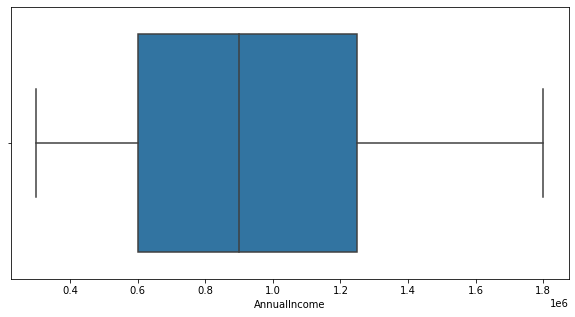

In [168]:
a, b = plt.subplots(1,1, figsize=(10,5))
sns.boxplot(df['AnnualIncome'])

<AxesSubplot:xlabel='Age'>

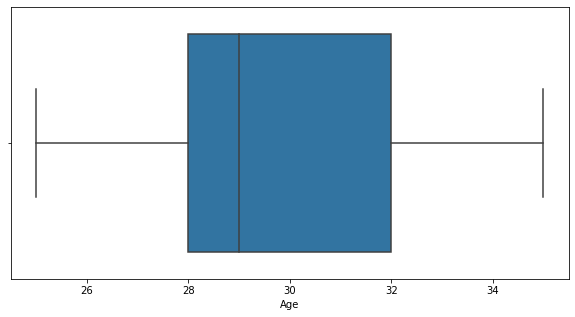

In [169]:
a, b = plt.subplots(1,1, figsize=(10,5))
sns.boxplot(df['Age'])

<AxesSubplot:xlabel='FamilyMembers'>

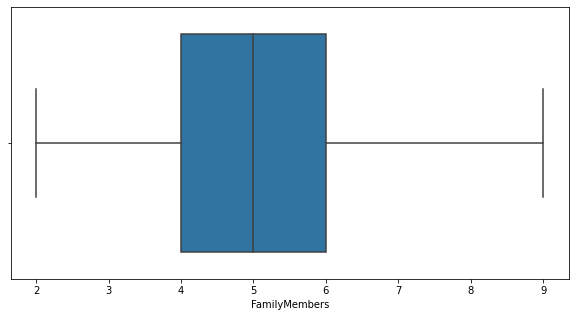

In [170]:
a, b = plt.subplots(1,1, figsize=(10,5))
sns.boxplot(df['FamilyMembers'])

## 범주형 변수 수치형 변수로 변환

In [3]:
# Yes : 1 , No : 0
df['FrequentFlyer'] = df['FrequentFlyer'].map({'Yes': 1, 'No': 0})
df['EverTravelledAbroad'] = df['EverTravelledAbroad'].map({'Yes': 1, 'No': 0})
df['GraduateOrNot'] = df['GraduateOrNot'].map({'Yes': 1, 'No': 0})

# Government Sector : 1, Private Sector/Self Employed : 0
df["Employment Type"] = df["Employment Type"].map({"Government Sector" : 1, "Private Sector/Self Employed" : 0})

In [172]:
df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,1,1,400000,6,1,0,0,0
1,31,0,1,1250000,7,0,0,0,0
2,34,0,1,500000,4,1,0,0,1
3,28,0,1,700000,3,1,0,0,0
4,28,0,1,700000,8,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1982,33,0,1,1500000,4,0,1,1,1
1983,28,0,1,1750000,5,1,0,1,0
1984,28,0,1,1150000,6,1,0,0,0
1985,34,0,1,1000000,6,0,1,1,1


In [173]:
df.describe()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,29.650226,0.286865,0.851535,9.327630e+05,4.752894,0.277806,0.209864,0.191243,0.357323
std,2.913308,0.452412,0.355650,3.768557e+05,1.609650,0.448030,0.407314,0.393379,0.479332
min,25.000000,0.000000,0.000000,3.000000e+05,2.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,0.000000,1.000000,6.000000e+05,4.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,0.000000,1.000000,9.000000e+05,5.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,1.000000,1.000000,1.250000e+06,6.000000,1.000000,0.000000,0.000000,1.000000
max,35.000000,1.000000,1.000000,1.800000e+06,9.000000,1.000000,1.000000,1.000000,1.000000


## 데이터 탐색 by 그래프

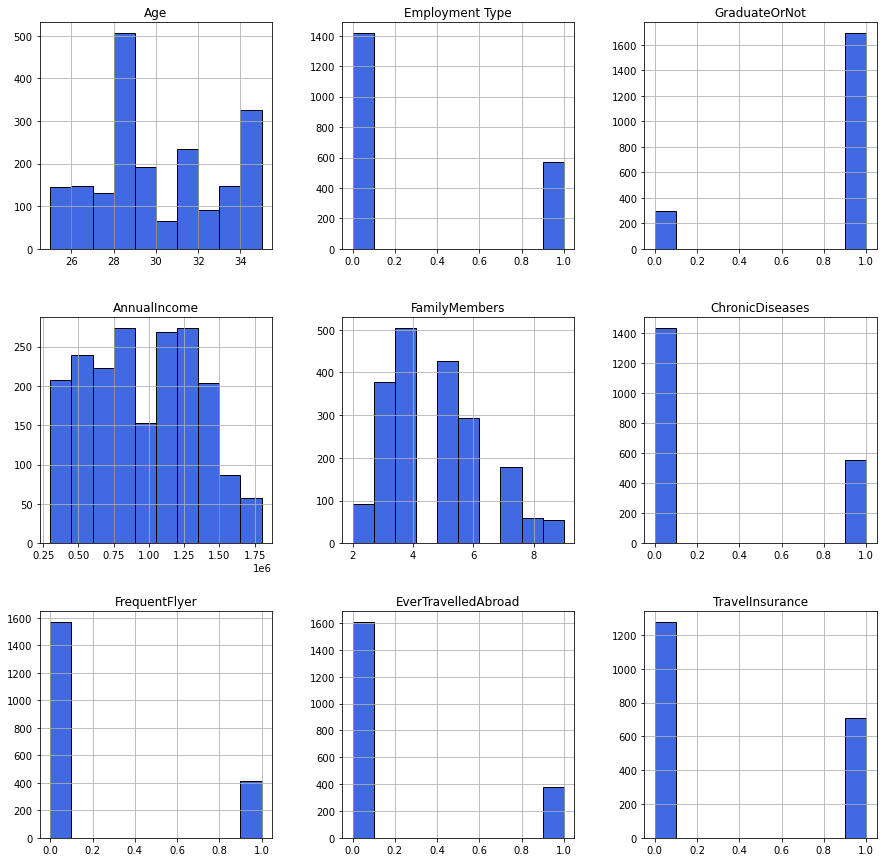

In [174]:
# histogram
df.hist(figsize=(15,15),bins=10, edgecolor = 'black', color='royalblue')
plt.show()

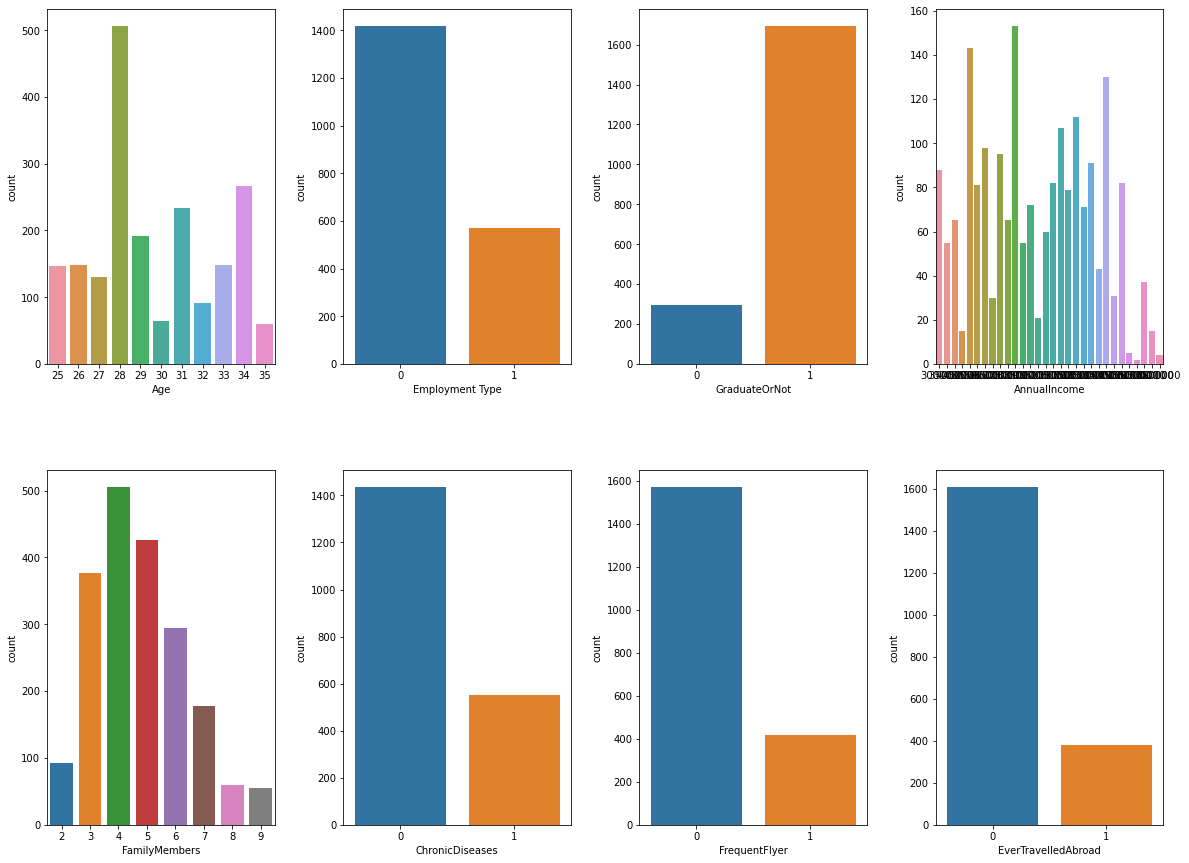

In [175]:
col_n = 4
row_n = 2

f, axes = plt.subplots(ncols=col_n, nrows=row_n)
f.set_size_inches((20, 15))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

for i,col in enumerate(df.columns[:-1]): 
    sns.countplot(df[col], ax=axes[int(i/col_n),int(i%col_n)])

plt.show()

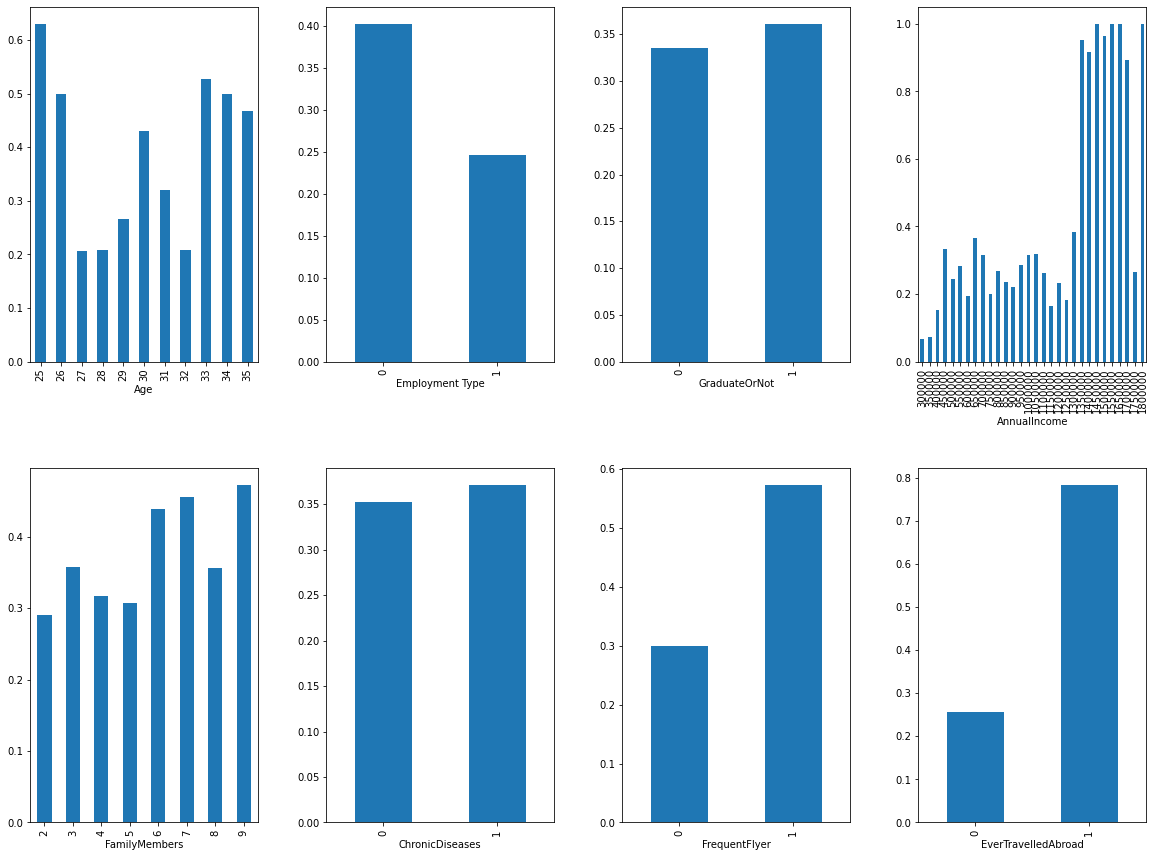

In [14]:
col_n = 4
row_n = 2

f, axes = plt.subplots(ncols=col_n, nrows=row_n)
f.set_size_inches((20, 15))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

for i,col in enumerate(df.columns[:-1]): 
    (df.groupby(col).sum()['TravelInsurance']/df.groupby(col).count()['TravelInsurance']).plot(kind='bar',ax=axes[int(i/col_n),int(i%col_n)])
#     sns.countplot(df[col], ax=axes[int(i/col_n),int(i%col_n)])

plt.show()

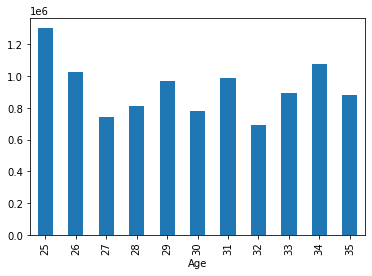

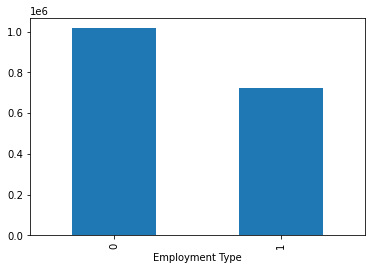

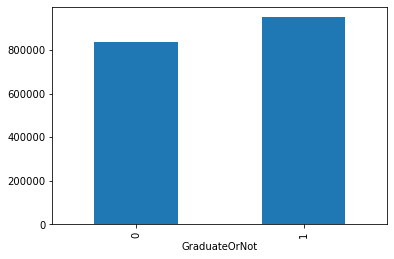

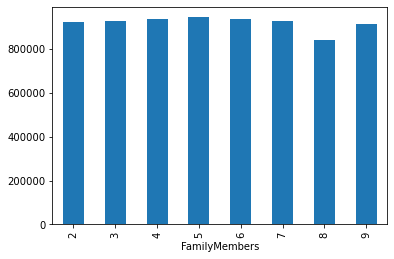

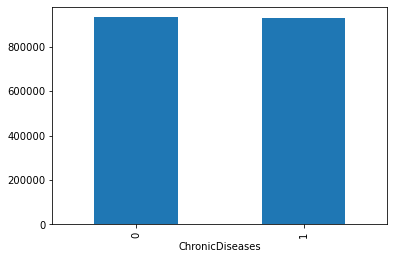

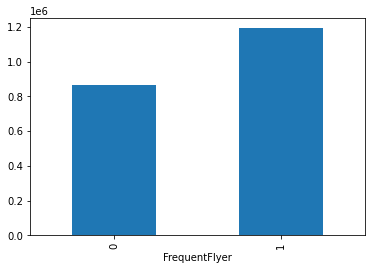

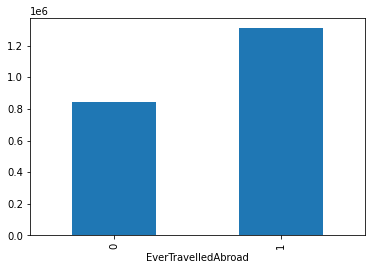

In [183]:
for i,col in enumerate(['Age', 'Employment Type', 'GraduateOrNot','FamilyMembers', 'ChronicDiseases', 'FrequentFlyer','EverTravelledAbroad']): 
    df.groupby(col).mean()['AnnualIncome'].plot(kind='bar')
    plt.show()

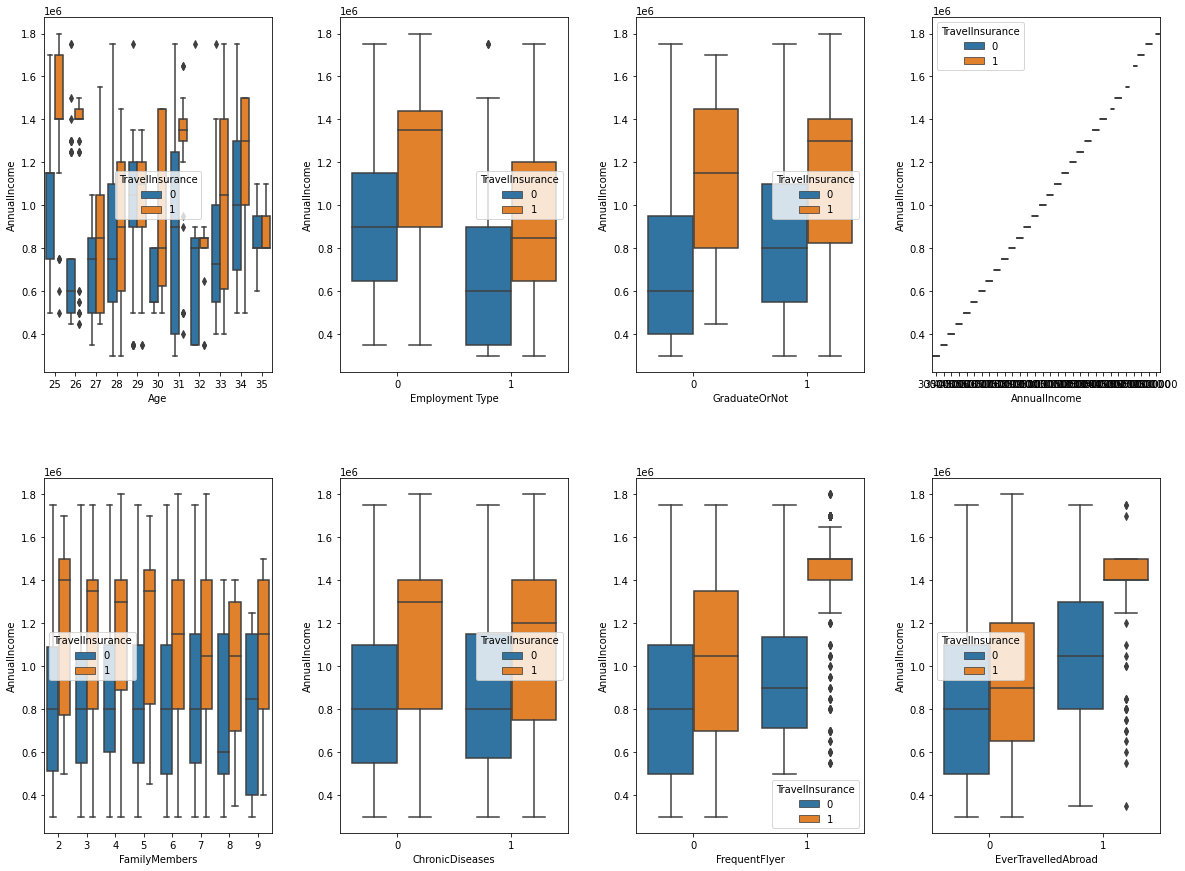

In [15]:
col_n = 4
row_n = 2

f, axes = plt.subplots(ncols=col_n, nrows=row_n)
f.set_size_inches((20, 15))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

for i,col in enumerate(df.columns[:-1]): 
    sns.boxplot(x= col,y='AnnualIncome',hue='TravelInsurance',data=df, ax=axes[int(i/col_n),int(i%col_n)])

plt.show()

## heatmap을 통해 상관관계 확인

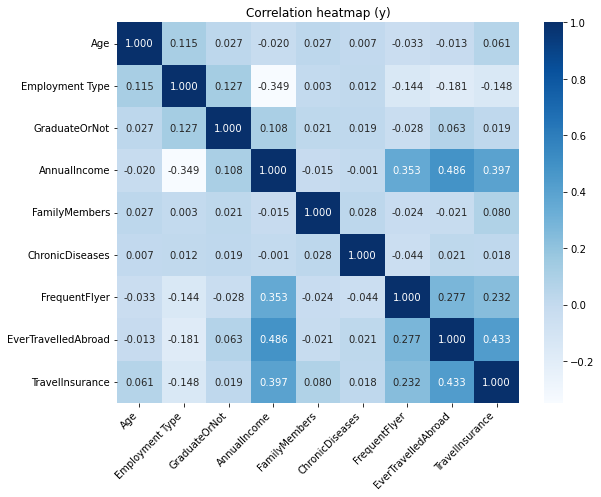

In [16]:
#heatmap
plt.figure(figsize = (9,7))
g = sns.heatmap(df.corr(), annot = True, cmap='Blues', fmt = '.3f')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Correlation heatmap (y)')
plt.show()

In [17]:
df_y1 = df[df['TravelInsurance']==1]
df_y0 = df[df['TravelInsurance']==0]

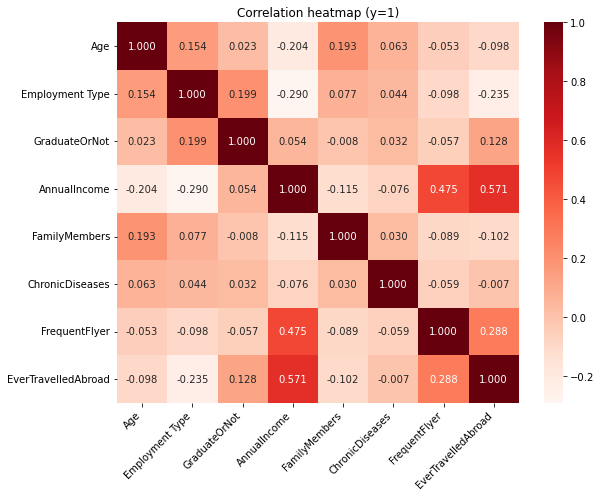

In [18]:
# y=1
plt.figure(figsize = (9,7))
g = sns.heatmap(df_y1.iloc[:,:-1].corr(), annot = True, cmap='Reds', fmt = '.3f')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Correlation heatmap (y=1)')
plt.show()

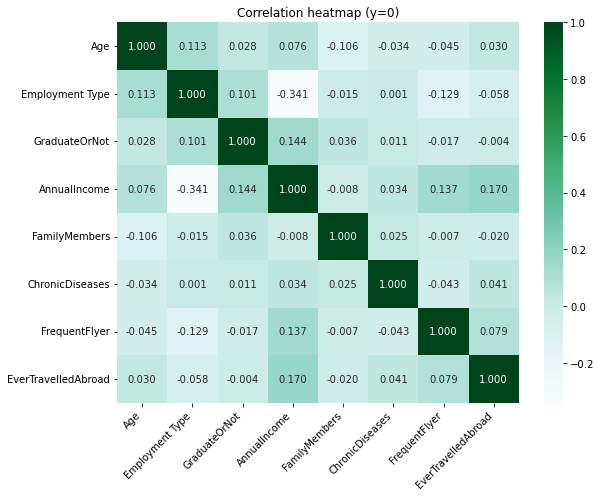

In [19]:
# y=0
plt.figure(figsize = (9,7))
g=sns.heatmap(df_y0.iloc[:,:-1].corr(), annot = True, cmap='BuGn', fmt = '.3f')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Correlation heatmap (y=0)')
plt.show()

## Scatter plot

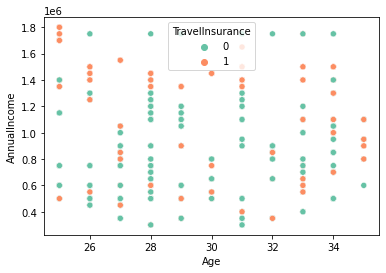

In [20]:
# scatterplot
sns.scatterplot(data=df, x="Age", y="AnnualIncome", hue="TravelInsurance", palette='Set2')
plt.show()

In [21]:
def get_scatterplot(y_val):
    f, axes = plt.subplots(ncols=8)
    f.set_size_inches((40, 5))
    plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

    for i,col in enumerate(df.columns[:-1]): 
        sns.scatterplot(data=df, x=col, y=y_val, hue="TravelInsurance", palette='Set2', ax=axes[i], legend = False)
    plt.show()

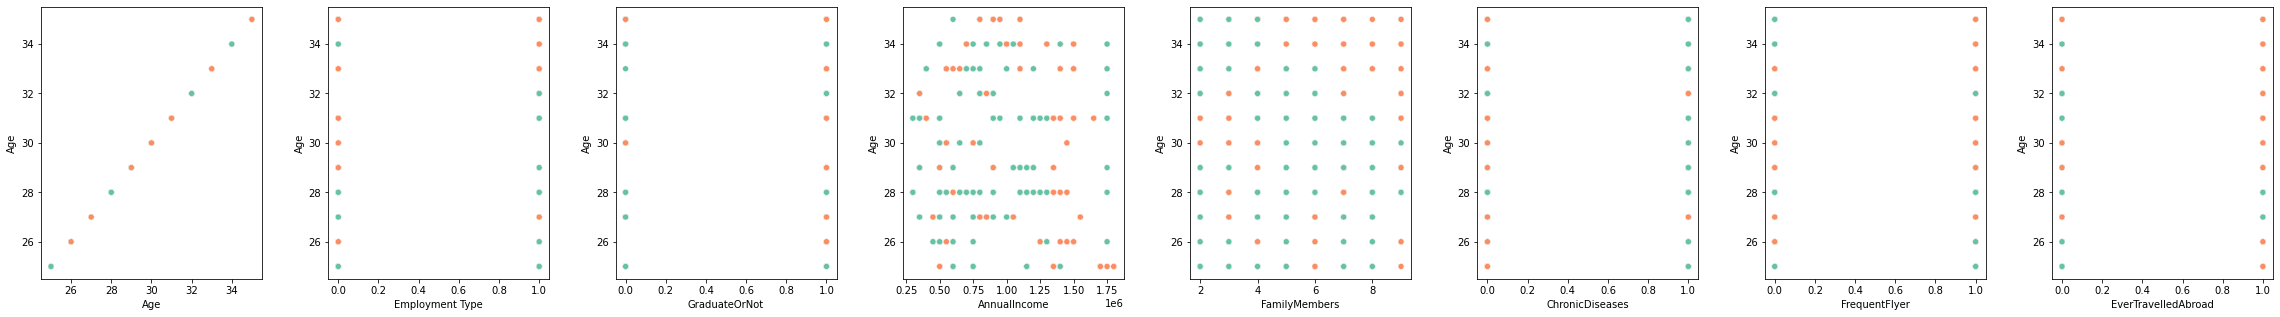

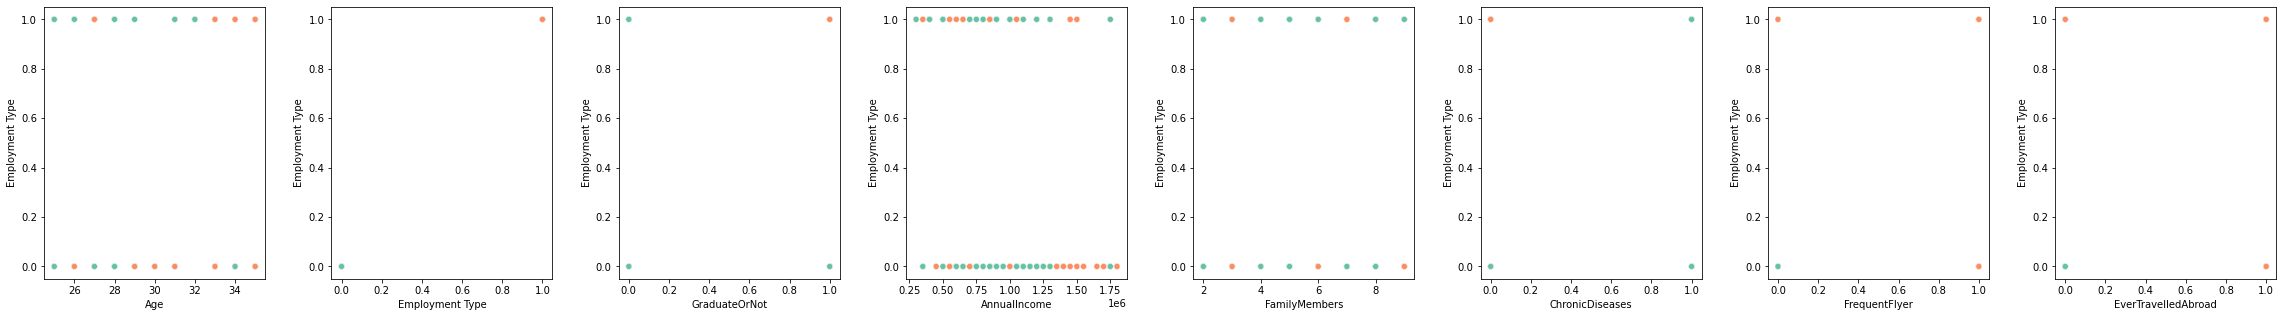

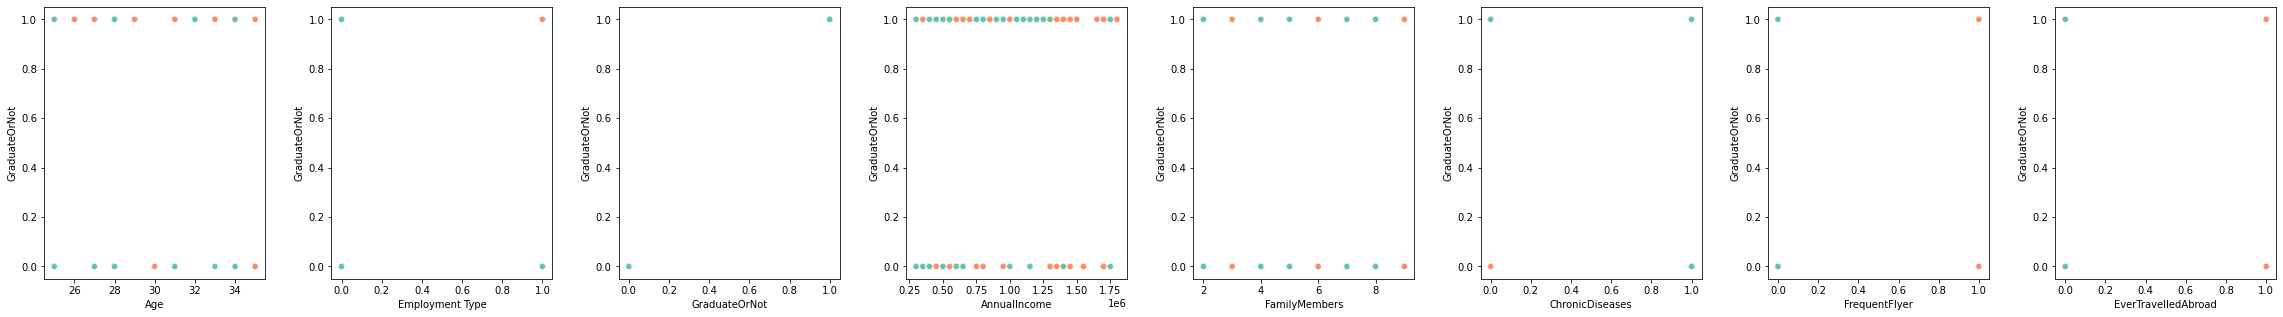

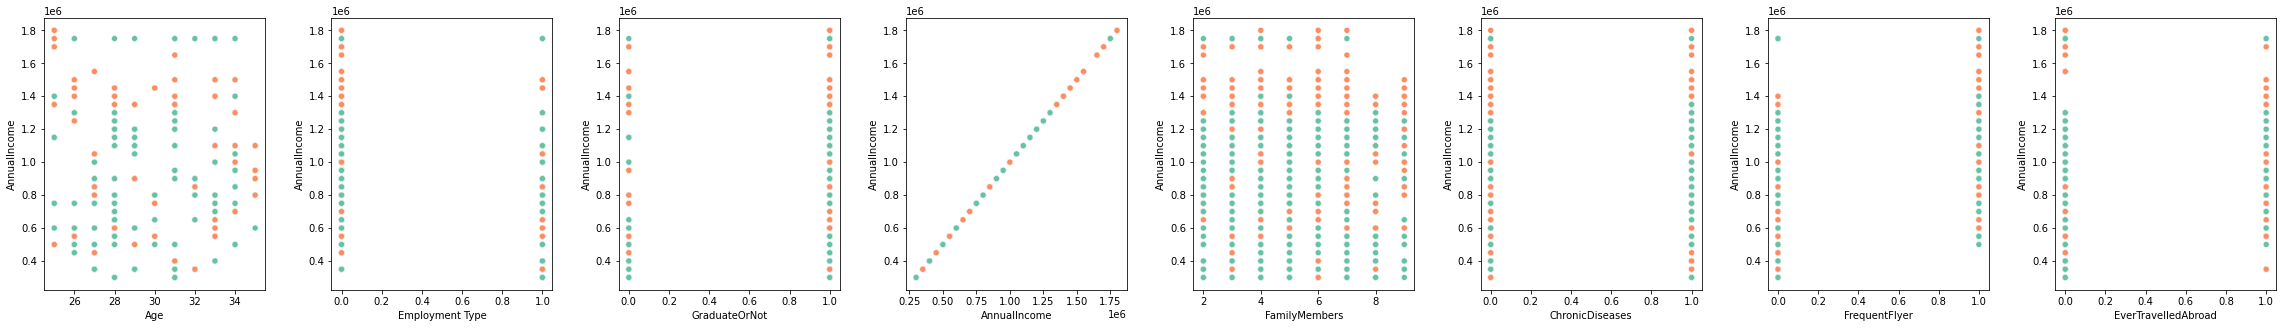

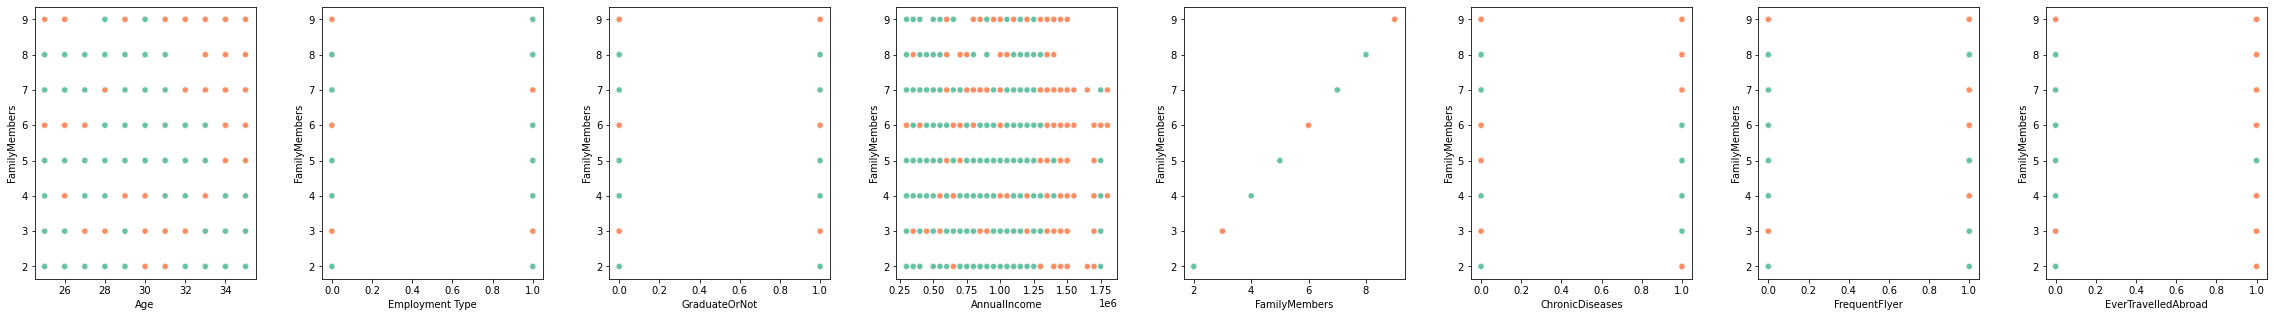

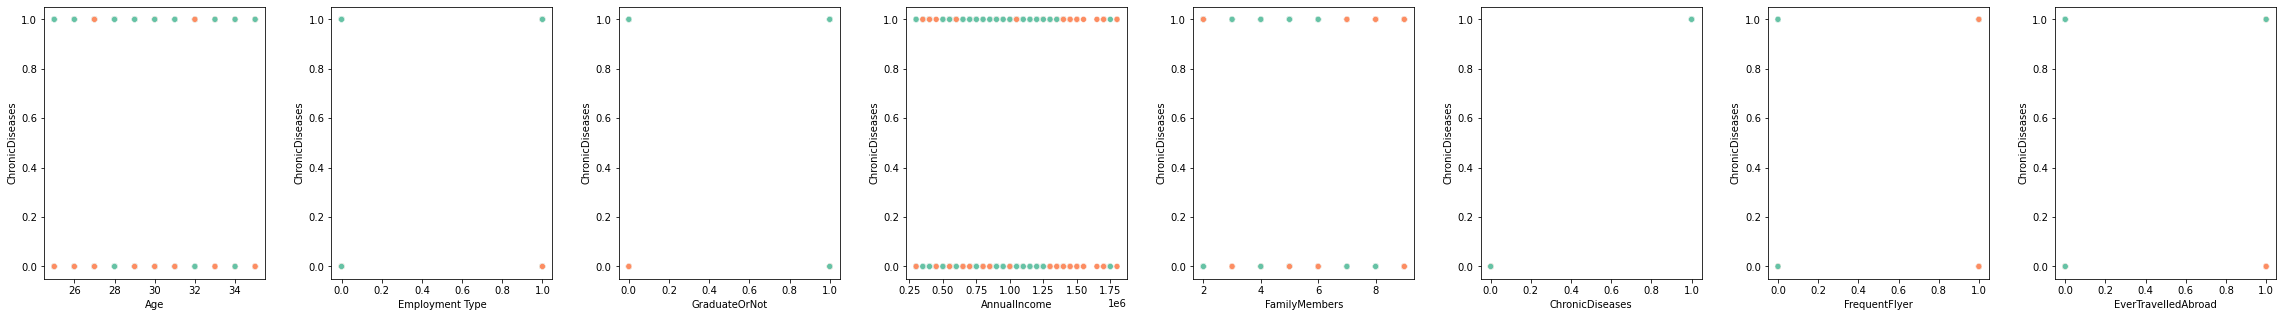

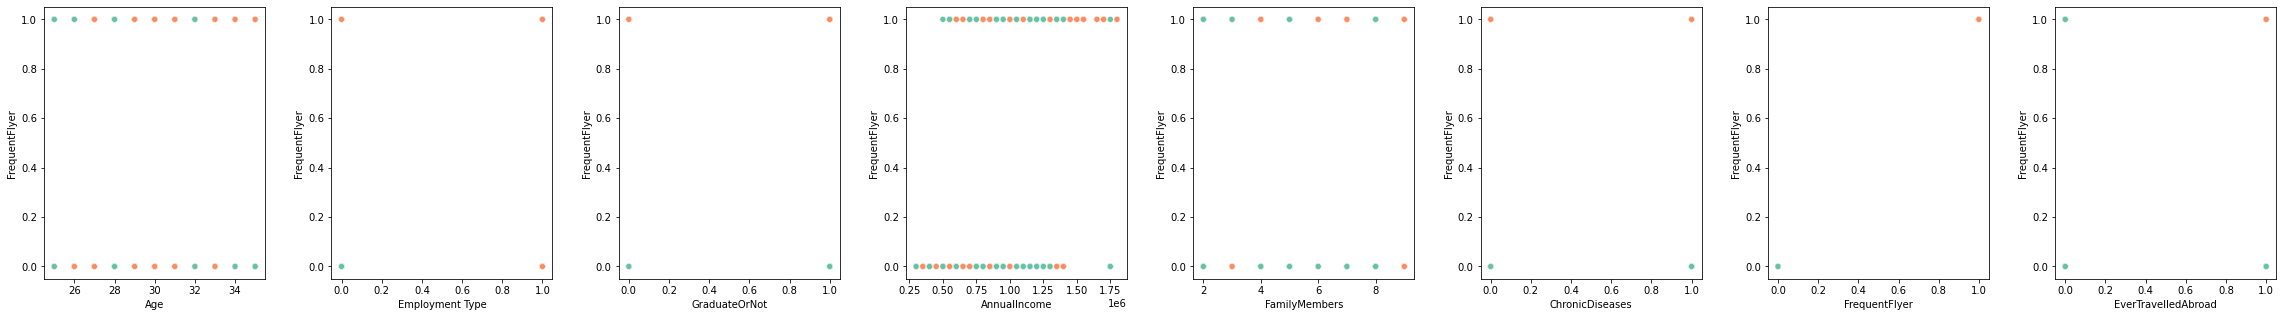

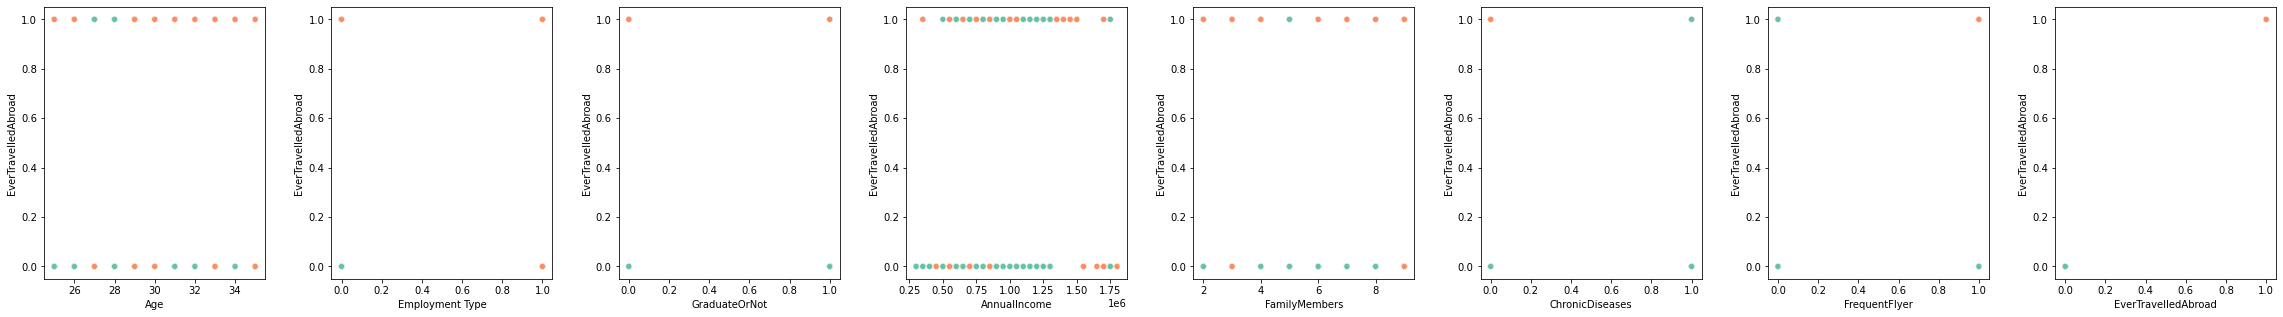

In [22]:
for col in df.columns[:-1]:
    get_scatterplot(col)

## Coverage-Homogeneity plot

In [5]:
len(df[df['TravelInsurance']==1])/len(df)

0.3573225968797182

In [6]:
np.unique(df['TravelInsurance'], return_counts=True)

(array([0, 1], dtype=int64), array([1277,  710], dtype=int64))

In [7]:
_, counts =np.unique(df['TravelInsurance'], return_counts=True)
ps = counts / len(df['TravelInsurance'])
print(counts)
print(ps)

[1277  710]
[0.6426774 0.3573226]


In [26]:
def _coverage(subset,n):
    return subset.shape[0]/n
def _homogeneity(y):
    _, counts = np.unique(y, return_counts=True)
    ps = counts / len(y)
    return max(ps)

def _weightedAvg(cov, hom, dataset,target_name,target_y):
    p = len(dataset[dataset[target_name]==target_y])/len(df)
    return cov*(hom-p)

def coverHomo(dataset, target_name, col, operator):         
    coverage = []
    homogeneity = []
    weightedAvg = []
    unique_values = np.unique(dataset[col])
    if operator == "<=":
        target_y = 0
    elif operator == ">=":
        target_y = 1
    ops = {"<=": (lambda x,y: x<=y), ">=": (lambda x,y: x>=y)}
    for cut_point in unique_values:
        subset = dataset[ops[operator] (dataset[col],cut_point)]
        cov = _coverage(subset[target_name], dataset.shape[0])
        hom = _homogeneity(subset[target_name])
        coverage.append(cov)
        homogeneity.append(hom)
        weightedAvg.append(_weightedAvg(cov,hom,dataset,target_name,target_y))
    return coverage, homogeneity, unique_values, weightedAvg

In [27]:
num_col = df.drop(columns='TravelInsurance').select_dtypes(include=['number']).columns.tolist()
print('numeric:',num_col)
cat_col = df.drop(columns='TravelInsurance').select_dtypes(include=['object']).columns.tolist()
print('categorical:',cat_col)

numeric: ['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad']
categorical: []


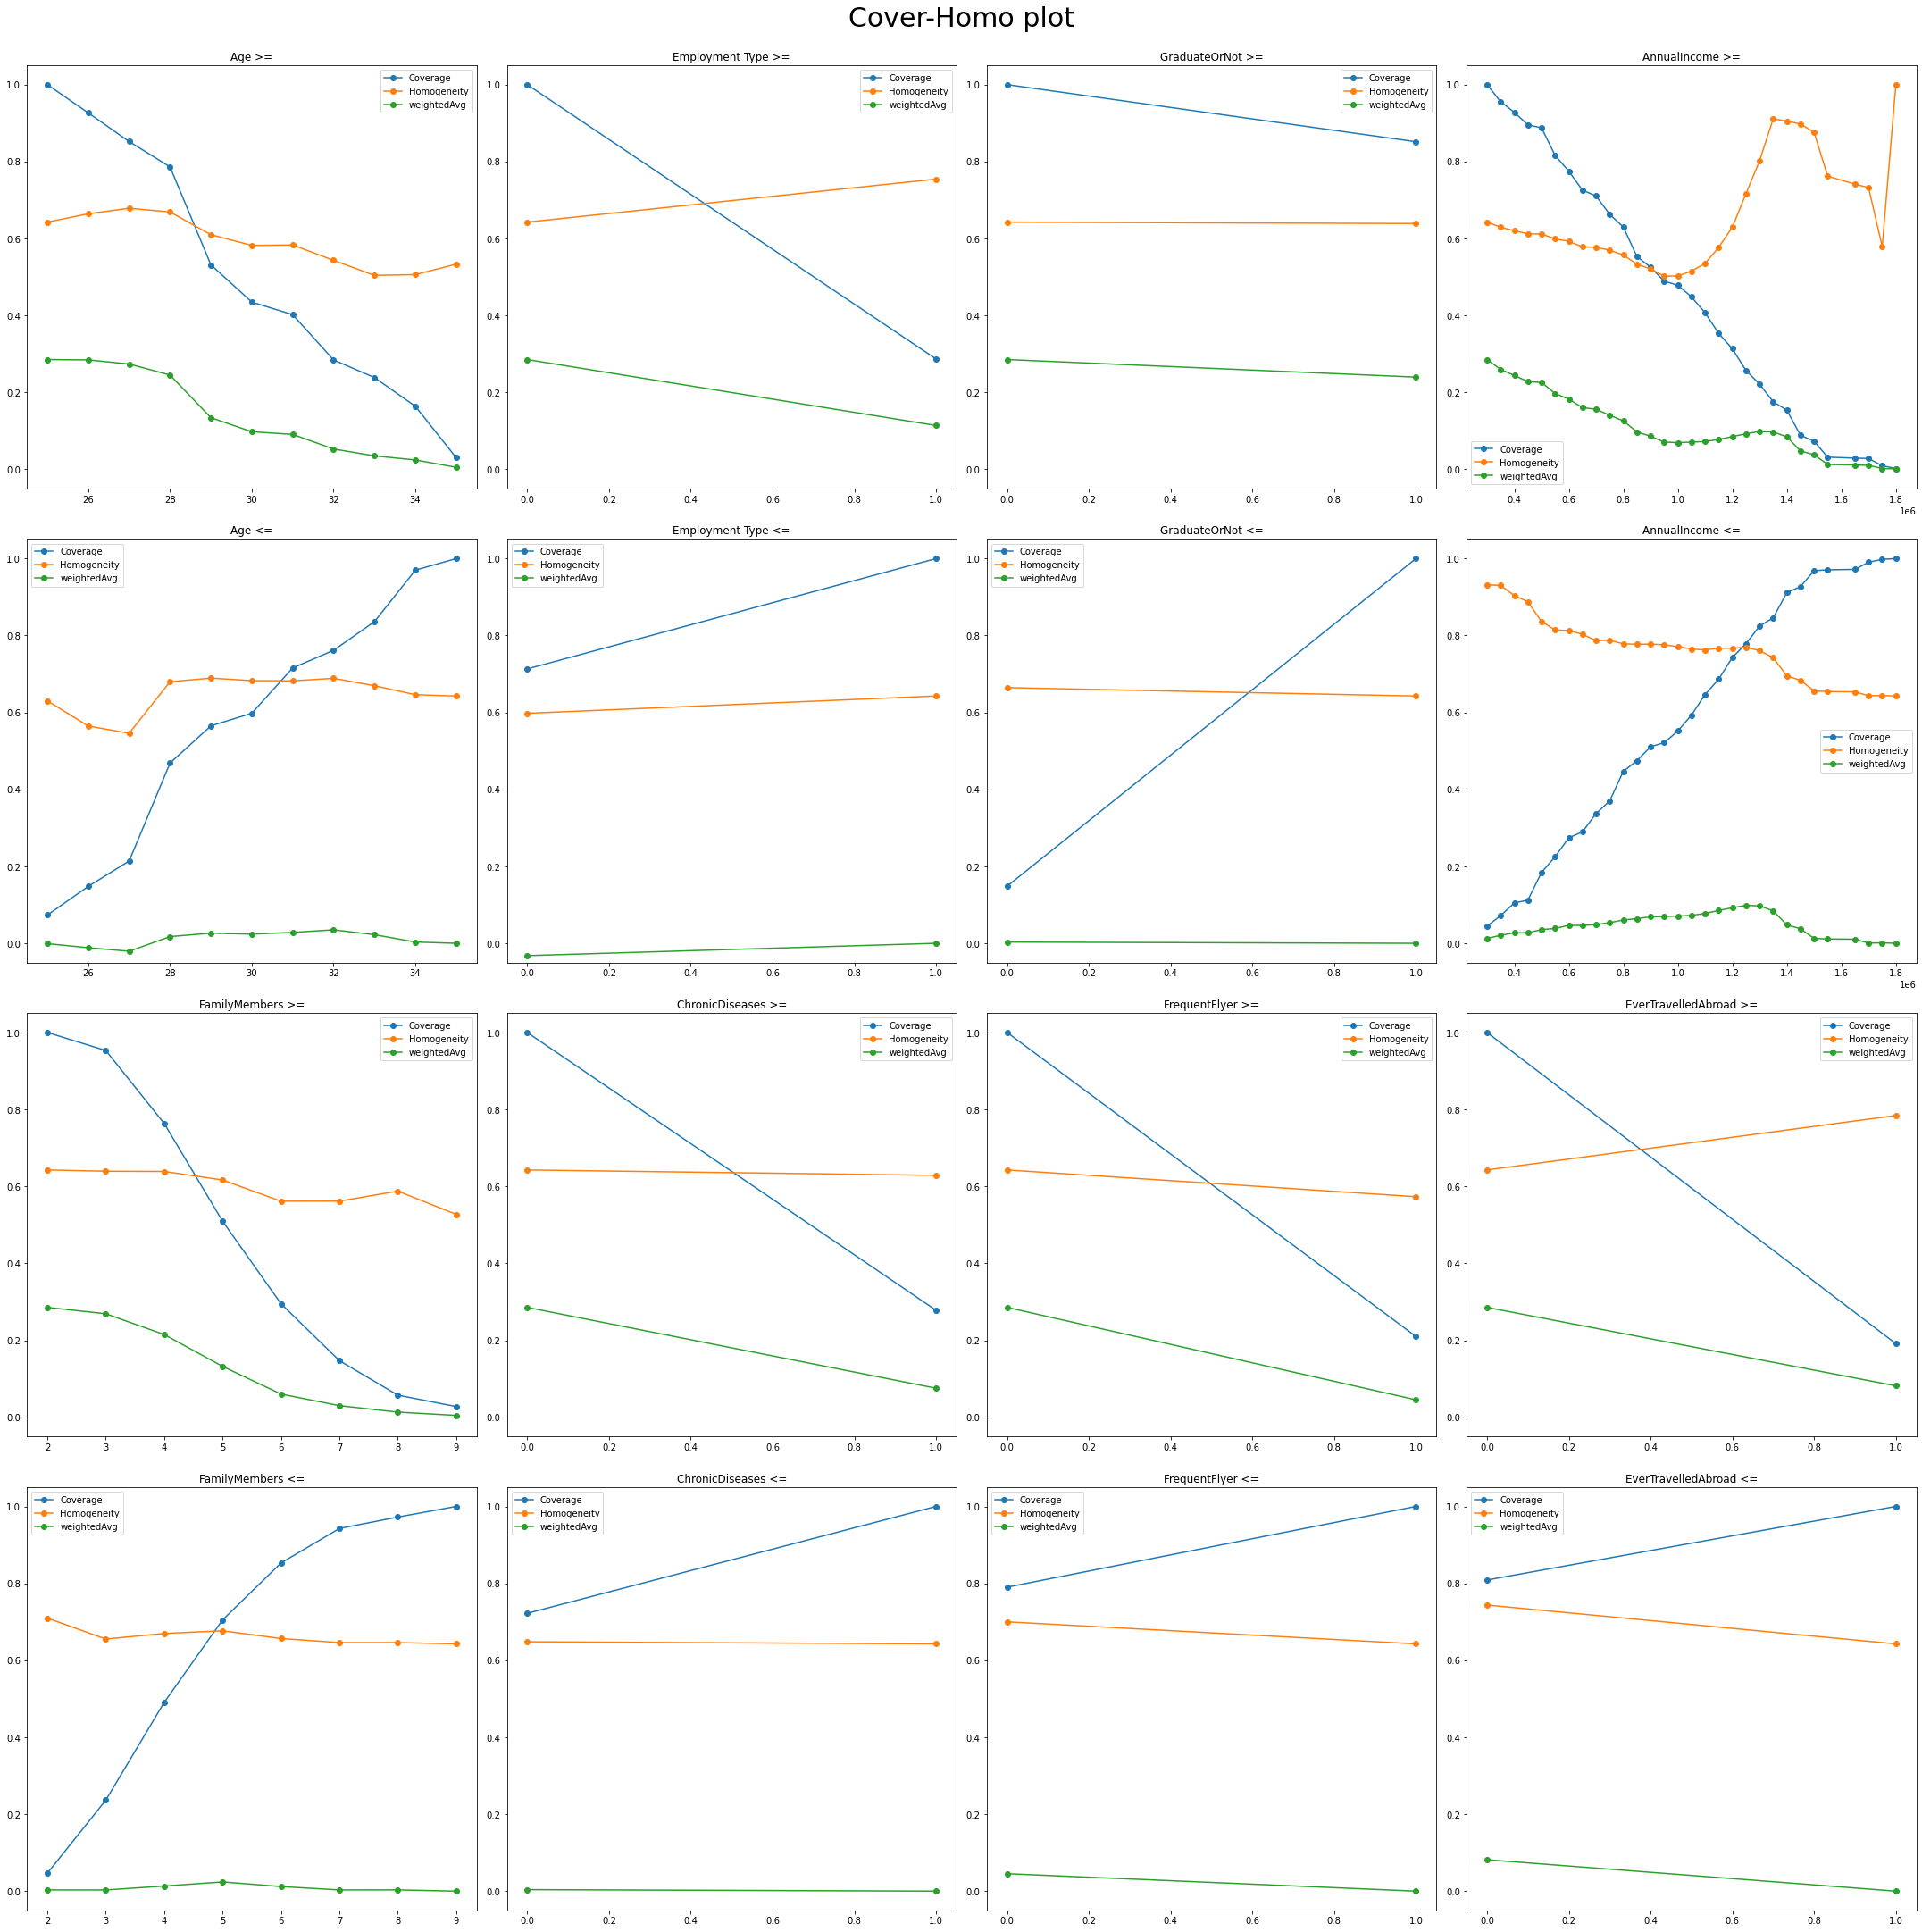

In [28]:
ncols = 4
nrows = len(num_col) // ncols + (len(num_col) % ncols > 0)
n=1
i=0

plt.figure(figsize=(30, 30)) 
for col in num_col[:]:
    ax1 = plt.subplot(nrows*2, ncols, n+i)
    cover, homo, cut_points, wAvg = coverHomo(df, 'TravelInsurance', col, '>=')
    ax1.plot(cut_points,cover,'-o')
    ax1.plot(cut_points,homo,'-o')
    ax1.plot(cut_points,wAvg,'-o')
    ax1.set_title(col +' >=')
    ax1.legend(['Coverage','Homogeneity','weightedAvg'])
    ax1.set_ylim(-0.05,1.05)
    
    ax2 = plt.subplot(nrows*2, ncols, n+i+ncols)
    cover, homo, cut_points, wAvg = coverHomo(df, 'TravelInsurance', col, '<=')
    ax2.plot(cut_points,cover,'-o')
    ax2.plot(cut_points,homo,'-o')
    ax2.plot(cut_points,wAvg,'-o')
    ax2.set_title(col +' <=')
    ax2.legend(['Coverage','Homogeneity','weightedAvg'])
    ax2.set_ylim(-0.05,1.05)
    if n % (ncols) == 0 : i+=ncols
    n+=1

plt.suptitle("Cover-Homo plot", fontsize=30, y=1)
plt.savefig('coverHomo.png', dpi=300, transparent=True) # save figure (dpi=300, transparent=True)
plt.tight_layout()
plt.show()

# 모델링

## Classification Tree

### 기본

In [482]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression


#시각화

from sklearn import tree

In [225]:
# 테스트셋 분리
X = df.drop(columns='TravelInsurance')
y = df['TravelInsurance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [226]:
param_grid = {'max_depth':range(2,20,1),
             'min_samples_split':range(2,100,10),
             'criterion':['gini','entropy']}

grid_cv = GridSearchCV(DecisionTreeClassifier(), param_grid, n_jobs=-1)
grid_cv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20),
                         'min_samples_split': range(2, 100, 10)})

In [227]:
print(grid_cv.best_params_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


In [156]:
# accuracy score
train_acc = grid_cv.score(X_train,y_train)
test_acc = grid_cv.score(X_test,y_test)
print('train accuracy:', train_acc)
print('test accuracy:', test_acc)

train accuracy: 0.8382630585273757
test accuracy: 0.8266331658291457


In [228]:
clf_tree = DecisionTreeClassifier(criterion = 'gini', max_depth=3,min_samples_split= 2)
clf_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [159]:
pred_y = clf_tree.predict(X_test)

In [160]:
accuracy_score(y_test, pred_y)

0.8266331658291457

In [230]:
best_feature_importances = clf_tree.feature_importances_
best_feature_importances

array([0.09609302, 0.        , 0.00131897, 0.69178866, 0.21079935,
       0.        , 0.        , 0.        ])

In [231]:
sorted_idx = np.argsort(best_feature_importances)[::-1]

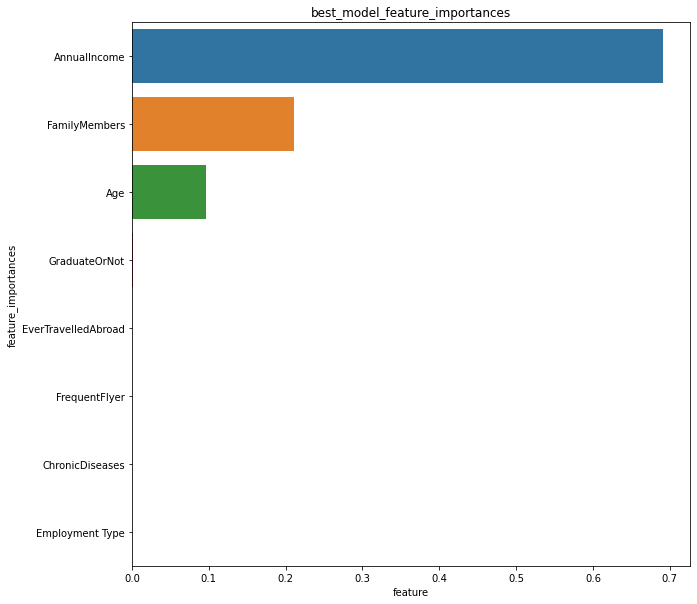

In [232]:
ft_importances = pd.Series(best_feature_importances)

ft_importances
plt.figure(figsize=(10,10))
plt.title("best_model_feature_importances")
plt.xlabel("feature")
plt.ylabel("feature_importances")
sns.barplot(ft_importances[sorted_idx], X.columns[sorted_idx])
plt.show()

In [164]:
print(tree.export_text(clf_tree, feature_names=X.columns.tolist()))

|--- AnnualIncome <= 1325000.00
|   |--- Age <= 32.50
|   |   |--- AnnualIncome <= 425000.00
|   |   |   |--- class: 0
|   |   |--- AnnualIncome >  425000.00
|   |   |   |--- class: 0
|   |--- Age >  32.50
|   |   |--- FamilyMembers <= 5.50
|   |   |   |--- class: 0
|   |   |--- FamilyMembers >  5.50
|   |   |   |--- class: 1
|--- AnnualIncome >  1325000.00
|   |--- AnnualIncome <= 1725000.00
|   |   |--- GraduateOrNot <= 0.50
|   |   |   |--- class: 1
|   |   |--- GraduateOrNot >  0.50
|   |   |   |--- class: 1
|   |--- AnnualIncome >  1725000.00
|   |   |--- Age <= 25.50
|   |   |   |--- class: 1
|   |   |--- Age >  25.50
|   |   |   |--- class: 0



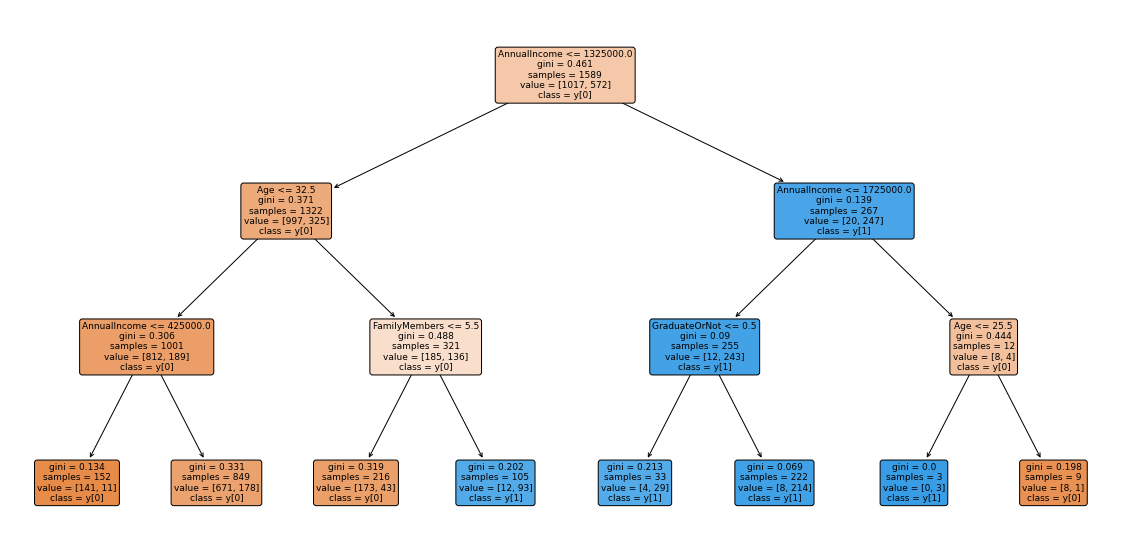

In [165]:
plt.figure(figsize=(20, 10)) 

tree.plot_tree(clf_tree,
               feature_names=X.columns, class_names=True,
               filled=True, rounded=True,)

plt.show()

### ccp_alpha 사용

In [32]:
clf_tree = DecisionTreeClassifier(ccp_alpha=0.03) # cost complexity alpha
clf_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.03)

In [33]:
# accuracy score
train_acc = clf_tree.score(X_train,y_train)
test_acc = clf_tree.score(X_test,y_test)
print('train accuracy:', train_acc)
print('test accuracy:', test_acc)

train accuracy: 0.7910635619886721
test accuracy: 0.7713567839195979


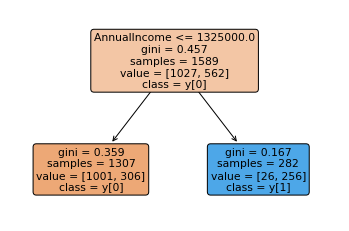

In [34]:
tree.plot_tree(clf_tree,
               feature_names=X.columns, class_names=True,
               filled=True, rounded=True) 
plt.show()

### model tree

In [167]:
# Use these python files to find entropy gain_ratio(/modules/.)
from modules.usertree import userTree as utr
import modules3.utils as utils

In [168]:
target_name = 'TravelInsurance'
X = df.drop(columns=target_name).copy()
y = df[target_name].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Concatenating X,y -> training dataset([X_train,y_train]), test dataset([X_test,y_test]) 
train_idx, test_idx = X_train.index, X_test.index
df_train, df_test = df.loc[train_idx,:], df.loc[test_idx,:]
df_train.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
159,27,1,1,900000,7,1,0,0,0
799,31,1,1,1200000,3,0,0,0,0
318,34,1,1,1100000,3,0,0,0,1
1399,25,0,0,600000,3,1,0,0,0
465,26,0,1,1500000,5,0,1,1,1


In [169]:
# our program
## params: entropy, gini, entropy_GR 
clf = utr(max_depth=3, min_samples=0.01*len(df_train), params ='entropy_GR')

In [ ]:
# fitting a tree
target_name = 'TravelInsurance' # target_attribute_name: 목표변수(y) 컬럼명
clf.fit(df_train, target_attribute_name = target_name)

In [44]:
# predictive performance using our modules
pred_y, prob_ = clf.predict(df_train, clf.tree)

scores = utils.perform_check(df_train[target_name],
         pred_y, prob_,
         len(clf.CLASS_DICT_), clf.CLASS_DICT_)
scores[0] # accuracy

0.8338577721837633

In [45]:
# using scikit-learn
accuracy_score(df_train[target_name], pred_y.values.ravel().astype(int))

0.8338577721837633

## 로지스틱 회귀

In [233]:
# X = df[['AnnualIncome']].copy()
X = df.drop(columns='TravelInsurance')
y = df['TravelInsurance'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

In [234]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [235]:
# solver : 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train,y_train)

LogisticRegression()

In [177]:
y_pred = logistic_reg.predict(X_test)

In [178]:
accuracy_score(y_pred, y_test)

0.7336683417085427

In [236]:
clf = LogisticRegression(random_state=0)
params = {"C":[1,3,5,7,9]} # 규제 강도 설정
grid_cv = GridSearchCV(logistic_reg, param_grid=params, cv = 4, scoring='accuracy', verbose=1)
grid_cv.fit(X_train, y_train)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [1, 3, 5, 7, 9]}, scoring='accuracy', verbose=1)

In [237]:
grid_cv.best_estimator_

LogisticRegression(C=1)

In [238]:
# accuracy score
train_acc = grid_cv.score(X_train,y_train)
test_acc = grid_cv.score(X_test,y_test)
print('train accuracy:', train_acc)
print('test accuracy:', test_acc)

train accuracy: 0.7784770295783512
test accuracy: 0.7336683417085427


In [239]:
grid_cv.best_estimator_.score(X_test, y_test)

0.7336683417085427

In [244]:
X1 = df[['AnnualIncome']].copy()

scaler = StandardScaler()
X1 = scaler.fit_transform(X1)

logistic_reg = LogisticRegression(C=1, random_state=0)
logistic_reg.fit(X1,y)

LogisticRegression(C=1, random_state=0)

In [245]:
logistic_reg.coef_

array([[0.93074676]])

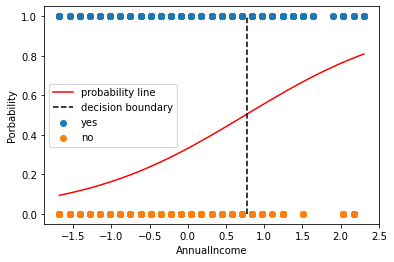

In [247]:
# plot logstic function
X_new = np.linspace(X1.min(), X1.max(), 100).reshape(-1,1)
y_proba = logistic_reg.predict_proba(X_new)

# y_proba
# X_new[y_proba[:,1] <= 0.5]
decision_boundary = X_new[y_proba[:,1] >= 0.5][0]

plt.figure()
plt.scatter(x=X1[y==1], y=y[y==1], label='yes')
plt.scatter(x=X1[y==0], y=y[y==0], label='no')
#plt.scatter(x=X[pred_y==1], y=pred_y[pred_y==1], label='predicted_man')
#plt.scatter(x=X[pred_y==0], y=pred_y[pred_y==0], label='predicted_woman')
plt.plot(X_new, y_proba[:,1], color= 'r', label = 'probability line')
plt.plot([decision_boundary, decision_boundary], [0, 1], "k--", label='decision boundary')
plt.legend()
plt.xlabel("AnnualIncome")
plt.ylabel("Porbability")
plt.show()

## 랜덤포레스트

In [249]:
X = df.drop(columns='TravelInsurance')
y = df['TravelInsurance'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [250]:
rfc = RandomForestClassifier(max_depth= 7, min_samples_leaf= 8, min_samples_split= 20, n_estimators= 451)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=8, min_samples_split=20,
                       n_estimators=451)

In [252]:
# accuracy score
train_acc = rfc.score(X_train,y_train)
test_acc = rfc.score(X_test,y_test)
print('train accuracy:', train_acc)
print('test accuracy:', test_acc)

train accuracy: 0.8344870988042794
test accuracy: 0.821608040201005


In [253]:
# n_estimators: tree 갯수, max_features: 
param_grid = [{'n_estimators': range(1, 500, 50), 'min_samples_leaf':[8,12,18],'min_samples_split':[8,16,20],
              'max_depth': range(3, 9, 2), }]

rfc = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rfc, param_grid=param_grid, cv=2, n_jobs=-1)

grid_rf.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'max_depth': range(3, 9, 2),
                          'min_samples_leaf': [8, 12, 18],
                          'min_samples_split': [8, 16, 20],
                          'n_estimators': range(1, 500, 50)}])

In [254]:
print(grid_rf.best_params_)

{'max_depth': 7, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 451}


In [255]:
# accuracy score
train_acc = grid_rf.score(X_train,y_train)
test_acc = grid_rf.score(X_test,y_test)
print('train accuracy:', train_acc)
print('test accuracy:', test_acc)

train accuracy: 0.8344870988042794
test accuracy: 0.821608040201005


In [258]:
best_feature_importances = grid_rf.best_estimator_.feature_importances_
best_feature_importances

array([0.15159302, 0.02265358, 0.01117318, 0.46020484, 0.10499248,
       0.00834091, 0.03781034, 0.20323164])

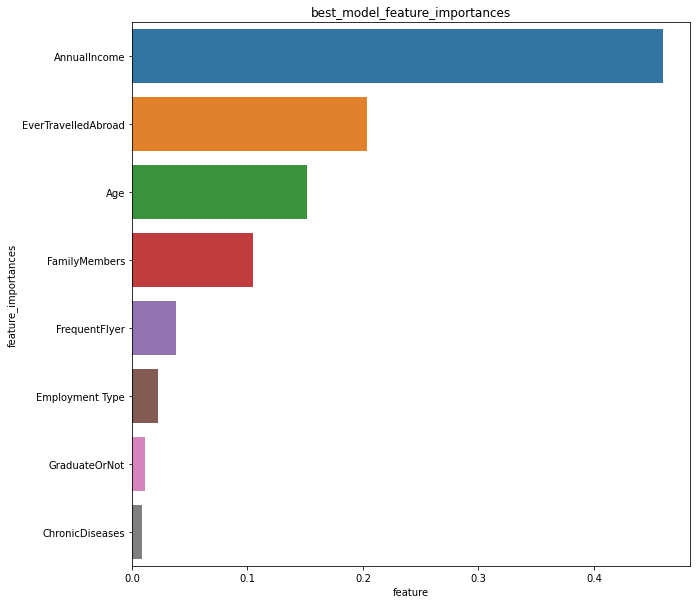

In [260]:
sorted_idx = np.argsort(best_feature_importances)[::-1]
X = df.drop(columns='TravelInsurance')
ft_importances = pd.Series(best_feature_importances)

ft_importances
plt.figure(figsize=(10,10))
plt.title("best_model_feature_importances")
plt.xlabel("feature")
plt.ylabel("feature_importances")
sns.barplot(x=ft_importances[sorted_idx], y=X.columns[sorted_idx])
plt.show()

## gradient boosting

In [184]:
X = df.drop(columns='TravelInsurance')
y = df['TravelInsurance'].copy()

scaler = StandardScaler()
X = scaler.fit_transform(X)

gb_clf=GradientBoostingClassifier( n_estimators=100)
gb_clf.fit(X,y)

GradientBoostingClassifier()

In [185]:
y_prob = gb_clf.predict_proba(X)
y_prob

array([[0.913042  , 0.086958  ],
       [0.78536003, 0.21463997],
       [0.67351158, 0.32648842],
       ...,
       [0.84755025, 0.15244975],
       [0.25550409, 0.74449591],
       [0.74312616, 0.25687384]])

In [186]:
y_pred = gb_clf.predict(X)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

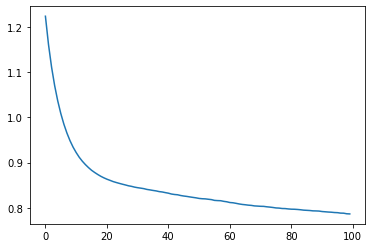

In [187]:
plt.plot(gb_clf.train_score_)

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [81]:
gb = GradientBoostingClassifier(random_state=42)

# n_estimators: tree 갯수, max_features: 
param_grid = [{'n_estimators': range(1, 500, 50), 'max_features': range(1, 10),
              'max_depth': range(3, 5), 'learning_rate': np.linspace(0.01, 0.1, 10)}]

gs = GridSearchCV(estimator=gb, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

gs.fit(X_train, y_train)

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid=[{'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
                          'max_depth': range(3, 5),
                          'max_features': range(1, 10),
                          'n_estimators': range(1, 500, 50)}],
             scoring='accuracy', verbose=1)

In [268]:
print(gs.best_params_)

{'learning_rate': 0.020000000000000004, 'max_depth': 4, 'max_features': 2, 'n_estimators': 251}


In [271]:
bestgb =GradientBoostingClassifier(learning_rate=0.020000000000000004, max_depth=4, max_features=2, n_estimators=251, random_state=42)

In [272]:
bestgb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.020000000000000004, max_depth=4,
                           max_features=2, n_estimators=251, random_state=42)

In [275]:
# accuracy score
train_acc = bestgb.score(X_train,y_train)
test_acc = bestgb.score(X_test,y_test)
print('train accuracy:', train_acc)
print('test accuracy:', test_acc)

train accuracy: 0.8439269981120201
test accuracy: 0.8316582914572864


In [83]:
print("Best Estimator Parameters" )
print("---------------------------" )
print("n_estimators: %d" %best_gsb_estimator.n_estimators )
print("max_depth: %d" %best_gsb_estimator.max_depth )
print("Learning Rate: %.3f" %best_gsb_estimator.learning_rate )
print("min_samples_leaf: %d" %best_gsb_estimator.min_samples_leaf )
print("max_features: %d" %best_gsb_estimator.max_features) 
print("---------------------------" )

Best Estimator Parameters
---------------------------
n_estimators: 251
max_depth: 4
Learning Rate: 0.020
min_samples_leaf: 1
max_features: 2
---------------------------


In [277]:
best_feature_importances = bestgb.feature_importances_
best_feature_importances

array([0.16303067, 0.01905344, 0.01303709, 0.42425912, 0.1380777 ,
       0.00780157, 0.03673815, 0.19800225])

In [278]:
sorted_idx = np.argsort(best_feature_importances)[::-1]

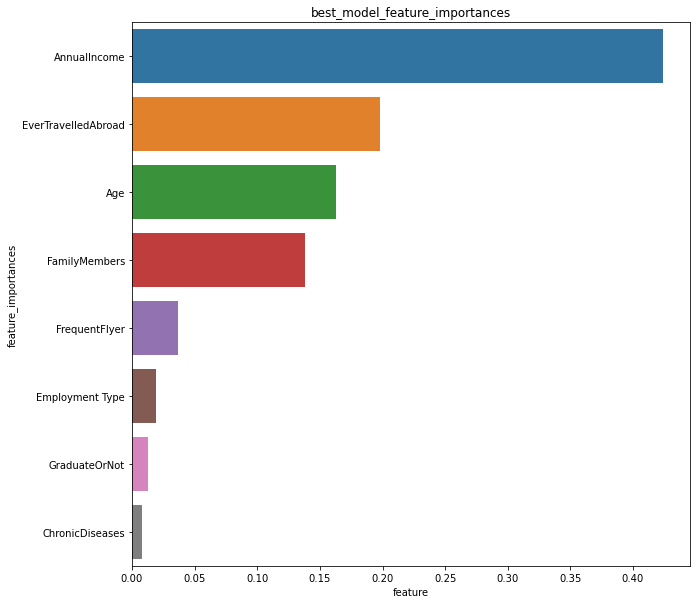

In [279]:
X = df.drop(columns='TravelInsurance')
ft_importances = pd.Series(best_feature_importances)

ft_importances
plt.figure(figsize=(10,10))
plt.title("best_model_feature_importances")
plt.xlabel("feature")
plt.ylabel("feature_importances")
sns.barplot(x=ft_importances[sorted_idx], y=X.columns[sorted_idx])
plt.show()

In [206]:
print("Train Accuracy: %.4f" %bestgb.score(X_train,y_train) )
print("Test Accuracy: %.4f" %bestgb.score(X_test,y_test) )

Train Accuracy: 0.8439
Test Accuracy: 0.8317


## KNN

In [208]:
X = df[['AnnualIncome','FamilyMembers','Age']]
y = df['TravelInsurance'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [213]:
k_range = list(range(1, 101))
param_grid = dict(n_neighbors=k_range)

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [214]:
print(grid_search.best_params_)

{'n_neighbors': 8}


In [222]:
best_knn =KNeighborsClassifier(8)
best_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [223]:
# accuracy score
train_acc = best_knn.score(X_train,y_train)
test_acc = best_knn.score(X_test,y_test)
print('train accuracy:', train_acc)
print('test accuracy:', test_acc)

train accuracy: 0.8351164254247955
test accuracy: 0.8015075376884422


# Using Regression Tree (로지스틱 활용)

## y=1 확률이 종속변수인 데이터프레임 만들기

In [402]:
X = df.drop(columns='TravelInsurance')
y = df['TravelInsurance'].copy()

scaler = StandardScaler()
X_scaling = scaler.fit_transform(X)

In [403]:
clf = LogisticRegression(random_state=0)
params = {"C":[1,3,5,7,9]} # 규제 강도 설정
grid_cv = GridSearchCV(clf, param_grid=params, cv = 4, scoring='accuracy', verbose=1)
grid_cv.fit(X_scaling, y)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


GridSearchCV(cv=4, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [1, 3, 5, 7, 9]}, scoring='accuracy', verbose=1)

In [404]:
grid_cv.best_estimator_

LogisticRegression(C=3, random_state=0)

In [405]:
grid_cv.best_estimator_.score(X_scaling, y)

0.7720181177654756

In [406]:
logistic_reg = LogisticRegression(C=3, random_state=0)
logistic_reg.fit(X_scaling,y)

LogisticRegression(C=3, random_state=0)

In [407]:
y_proba = logistic_reg.predict_proba(X_scaling)

In [408]:
df_rt = df.copy()
df_rt["proba_1"] = y_proba[:,1]
df_rt = df_rt.drop(columns='TravelInsurance')

## y=1 확률 값을 종속변수로 Regression Tree 생성

In [414]:
X = df_rt.drop(columns='proba_1').copy()
y = df_rt['proba_1']

In [415]:
reg_tree = DecisionTreeRegressor(max_depth=1, random_state=0)
reg_tree.fit(X, y)

DecisionTreeRegressor(max_depth=1, random_state=0)

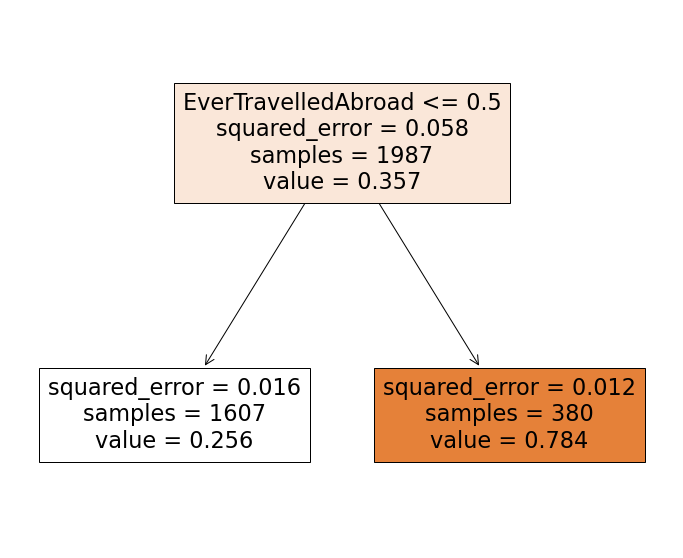

In [416]:
# plot tree
plt.figure(figsize=(12,10))
tree.plot_tree(reg_tree, feature_names=X.columns, filled=True)
plt.show()

In [417]:
reg_tree = DecisionTreeRegressor(max_depth=2, random_state=0)
reg_tree.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=0)

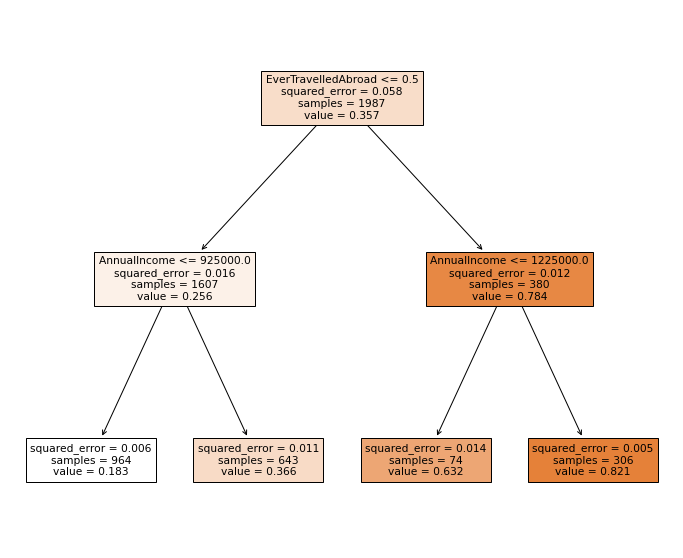

In [418]:
# plot tree
plt.figure(figsize=(12,10))
tree.plot_tree(reg_tree, feature_names=X.columns, filled=True)
plt.show()

## subset에 대한 regression

In [421]:
df_rule = df_rt.copy()

### rule1: EverTravelledAbroad = 0

In [422]:
df_rule_1 = df_rule[df_rule['EverTravelledAbroad']==0].copy()

#### one reg

In [423]:
numerical_col = ['Age', 'AnnualIncome', 'FamilyMembers']

def getR2_onereg(df, numerical_cols):
    for col in numerical_col:
        X = df[[col]]
        y = df['proba_1']

        m_reg = LinearRegression(fit_intercept = True)
        m_reg.fit(X, y) 
        r2 = round(m_reg.score(X, y),3)
        print(col + ':' + str(r2))

In [424]:
getR2_onereg(df_rule_1, numerical_col)

Age:0.06
AnnualIncome:0.707
FamilyMembers:0.12


In [425]:
X = df_rule_1[['AnnualIncome']]
y = df_rule_1['proba_1']

# 모델 객체 생성,
one_reg_1 = LinearRegression(fit_intercept = True)
one_reg_1.fit(X, y) 

LinearRegression()

In [426]:
r2 = round(one_reg_1.score(X, y),3)
print("R-Squared :", r2)

R-Squared : 0.707


In [427]:
def oneRegGraph(col, one_reg):
    coef = float(one_reg.coef_[0])
    intercept = float(one_reg.intercept_)

    x_minmax = np.array([min(X[col]), max(X[col])])
    fit_y = x_minmax * coef  + intercept

    plt.scatter(X, y)
    plt.plot(x_minmax, fit_y, color = 'red')
    plt.xlabel(col)
    plt.ylabel('prob')
    plt.show()

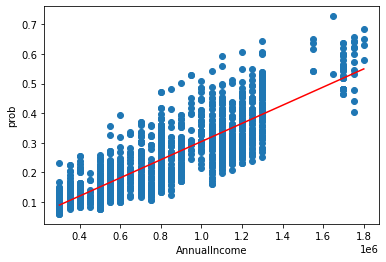

In [428]:
oneRegGraph('AnnualIncome', one_reg_1)

#### two reg

In [430]:
def getR2_tworeg(df, numerical_cols):
    for i in range(len(numerical_cols)):
        for j in range(len(numerical_cols)):
            if i < j:
                X = df[[numerical_cols[i],numerical_cols[j]]]
                y = df['proba_1']

                m_reg = LinearRegression(fit_intercept = True)
                m_reg.fit(X, y) 
                r2 = round(m_reg.score(X, y),3)
                print(numerical_cols[i] + '&' + numerical_cols[j] + ':' + str(r2))

In [431]:
getR2_tworeg(df_rule_1, numerical_col)

Age&AnnualIncome:0.77
Age&FamilyMembers:0.175
AnnualIncome&FamilyMembers:0.832


In [432]:
X = df_rule_1[['AnnualIncome', 'FamilyMembers']]
y = df_rule_1['proba_1']

# 모델 객체 생성,
two_reg_1 = LinearRegression(fit_intercept = True)
two_reg_1.fit(X, y) 

LinearRegression()

In [433]:
r2 = round(two_reg_1.score(X, y),3)
print("R-Squared :", r2)

R-Squared : 0.832


In [434]:
def twoRegResult(x1, x2, coef, icpt):
    return x1*coef[0] + x2*coef[1] + icpt

def getContour(col1, col2, two_reg, x_n, y_n):
    xrange = np.linspace(X[col1].min(), X[col1].max(), x_n)
    yrange = np.linspace(X[col2].min(), X[col2].max(), y_n)
    xmesh, ymesh = np.meshgrid(xrange, yrange)

    zmesh = twoRegResult(xmesh, ymesh, two_reg.coef_, two_reg.intercept_)
    
    cntr = plt.contour(xmesh, ymesh, zmesh, levels=15, cmap="RdBu_r")
    plt.colorbar(cntr)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show   

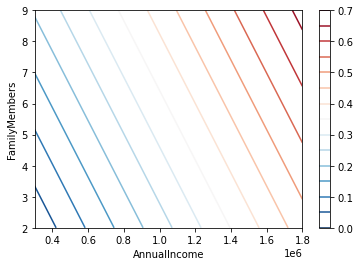

In [435]:
getContour('AnnualIncome', 'FamilyMembers', two_reg_1, 100, 9)

In [436]:
def getAccuracy_by_rt(orgin_df, rule_df):
    origin_target = orgin_df.iloc[rule_df[rule_df['proba_1']>=0.5].index,-1]
    return origin_target.sum()/len(origin_target)

getAccuracy_by_rt(df, df_rule_1)

0.7402597402597403

### rule2: EverTravelledAbroad = 1

In [437]:
df_rule_2 = df_rule[df_rule['EverTravelledAbroad']==1].copy()

#### one reg

In [438]:
getR2_onereg(df_rule_2, numerical_col)

Age:0.11
AnnualIncome:0.623
FamilyMembers:0.124


In [439]:
X = df_rule_2[['AnnualIncome']]
y = df_rule_2['proba_1']

# 모델 객체 생성,
one_reg_2 = LinearRegression(fit_intercept = True)
one_reg_2.fit(X, y) 

LinearRegression()

In [440]:
r2 = round(one_reg_2.score(X, y),3)
print("R-Squared :", r2)

R-Squared : 0.623


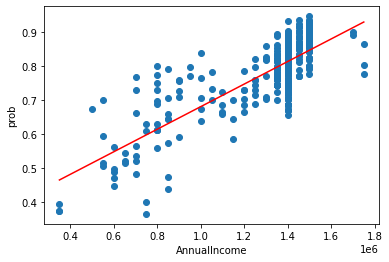

In [441]:
oneRegGraph('AnnualIncome', one_reg_2)

#### two reg

In [442]:
getR2_tworeg(df_rule_2, numerical_col)

Age&AnnualIncome:0.766
Age&FamilyMembers:0.233
AnnualIncome&FamilyMembers:0.743


In [443]:
X = df_rule_2[['AnnualIncome', 'Age']]
y = df_rule_2['proba_1']

# 모델 객체 생성,
two_reg_2 = LinearRegression(fit_intercept = True)
two_reg_2.fit(X, y) 

LinearRegression()

In [444]:
r2 = round(two_reg_2.score(X, y),3)
print("R-Squared :", r2)

R-Squared : 0.766


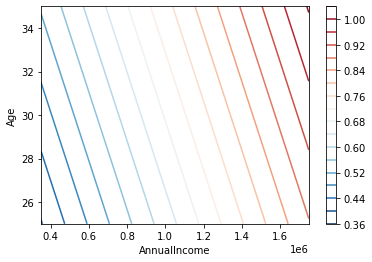

In [445]:
getContour('AnnualIncome', 'Age', two_reg_2, 100, 10)

### rule3: EverTravelledAbroad = 0 and AnnualIncome <= 925000

In [446]:
df_rule_3 = df_rule[(df_rule['EverTravelledAbroad']==0) & (df_rt['AnnualIncome']<= 925000)].copy()

#### one reg

In [447]:
getR2_onereg(df_rule_3, numerical_col)

Age:0.244
AnnualIncome:0.427
FamilyMembers:0.211


In [448]:
X = df_rule_3[['AnnualIncome']]
y = df_rule_3['proba_1']

# 모델 객체 생성,
one_reg_3 = LinearRegression(fit_intercept = True)
one_reg_3.fit(X, y) 

LinearRegression()

In [449]:
r2 = round(one_reg_3.score(X, y),3)
print("R-Squared :", r2)

R-Squared : 0.427


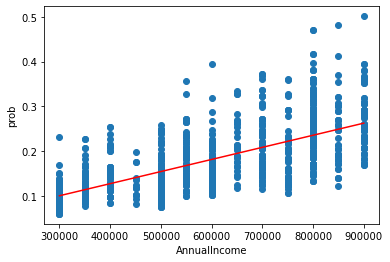

In [450]:
oneRegGraph('AnnualIncome', one_reg_3)

#### two reg

In [451]:
getR2_tworeg(df_rule_3, numerical_col)

Age&AnnualIncome:0.601
Age&FamilyMembers:0.441
AnnualIncome&FamilyMembers:0.672


In [452]:
X = df_rule_3[['AnnualIncome','FamilyMembers' ]]
y = df_rule_3['proba_1']

# 모델 객체 생성,
two_reg_3 = LinearRegression(fit_intercept = True)
two_reg_3.fit(X, y) 

LinearRegression()

In [453]:
r2 = round(two_reg_3.score(X, y),3)
print("R-Squared :", r2)

R-Squared : 0.672


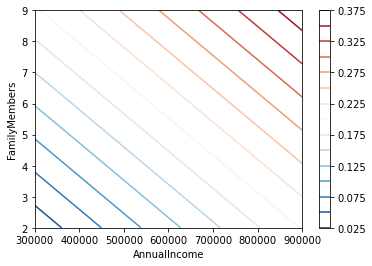

In [454]:
getContour('AnnualIncome','FamilyMembers', two_reg_3, 8, 11)

### rule4: EverTravelledAbroad = 0 and AnnualIncome > 925000

In [455]:
df_rule_4 = df_rule[(df_rule['EverTravelledAbroad']==0) & (df_rule['AnnualIncome']> 925000)].copy()

#### one reg

In [456]:
getR2_onereg(df_rule_4, numerical_col)

Age:0.018
AnnualIncome:0.392
FamilyMembers:0.242


In [457]:
X = df_rule_4[['AnnualIncome']]
y = df_rule_4['proba_1']

# 모델 객체 생성,
one_reg_4 = LinearRegression(fit_intercept = True)
one_reg_4.fit(X, y) 

LinearRegression()

In [458]:
r2 = round(one_reg_4.score(X, y),3)
print("R-Squared :", r2)

R-Squared : 0.392


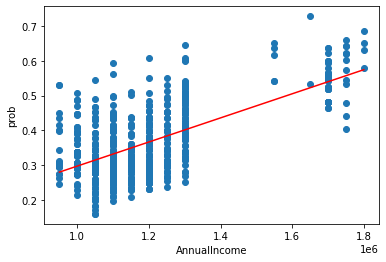

In [459]:
oneRegGraph('AnnualIncome', one_reg_4)

#### two reg

In [460]:
getR2_tworeg(df_rule_4, numerical_col)

Age&AnnualIncome:0.524
Age&FamilyMembers:0.256
AnnualIncome&FamilyMembers:0.674


In [461]:
X = df_rule_4[['AnnualIncome','FamilyMembers' ]]
y = df_rule_4['proba_1']

# 모델 객체 생성,
two_reg_4 = LinearRegression(fit_intercept = True)
two_reg_4.fit(X, y) 

LinearRegression()

In [462]:
r2 = round(two_reg_4.score(X, y),3)
print("R-Squared :", r2)

R-Squared : 0.674


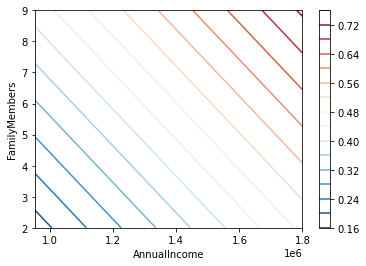

In [463]:
getContour('AnnualIncome','FamilyMembers', two_reg_4, 100, 11)

### rule5: EverTravelledAbroad = 1 and AnnualIncome <= 1225000

In [464]:
df_rule_5 = df_rule[(df_rule['EverTravelledAbroad']==1) & (df_rule['AnnualIncome'] <=  1225000)].copy()

#### one reg

In [465]:
getR2_onereg(df_rule_5, numerical_col)

Age:0.189
AnnualIncome:0.372
FamilyMembers:0.344


In [466]:
X = df_rule_5[['AnnualIncome']]
y = df_rule_5['proba_1']

# 모델 객체 생성,
one_reg_5 = LinearRegression(fit_intercept = True)
one_reg_5.fit(X, y) 

LinearRegression()

In [467]:
r2 = round(one_reg_5.score(X, y),3)
print("R-Squared :", r2)

R-Squared : 0.372


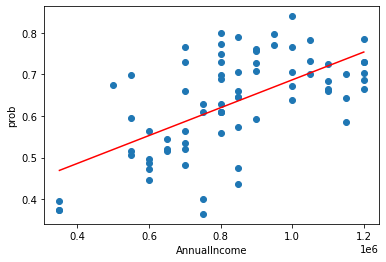

In [468]:
oneRegGraph('AnnualIncome', one_reg_5)

#### two reg

In [469]:
getR2_tworeg(df_rule_5, numerical_col)

Age&AnnualIncome:0.593
Age&FamilyMembers:0.479
AnnualIncome&FamilyMembers:0.681


In [470]:
X = df_rule_5[['AnnualIncome','FamilyMembers' ]]
y = df_rule_5['proba_1']

# 모델 객체 생성,
two_reg_5 = LinearRegression(fit_intercept = True)
two_reg_5.fit(X, y) 

LinearRegression()

In [471]:
r2 = round(two_reg_5.score(X, y),3)
print("R-Squared :", r2)

R-Squared : 0.681


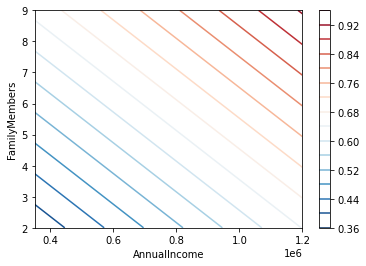

In [472]:
getContour('AnnualIncome','FamilyMembers', two_reg_5, 100, 11)

### rule6: EverTravelledAbroad = 1 and AnnualIncome > 1225000

In [473]:
df_rule_6 = df_rule[(df_rule['EverTravelledAbroad']==1) & (df_rule['AnnualIncome'] >  1225000)].copy()

#### one reg

In [474]:
getR2_onereg(df_rule_6, numerical_col)

Age:0.368
AnnualIncome:0.266
FamilyMembers:0.196


In [475]:
X = df_rule_6[['Age']]
y = df_rule_6['proba_1']

# 모델 객체 생성,
one_reg_6 = LinearRegression(fit_intercept = True)
one_reg_6.fit(X, y) 

LinearRegression()

In [476]:
r2 = round(one_reg_6.score(X, y),3)
print("R-Squared :", r2)

R-Squared : 0.368


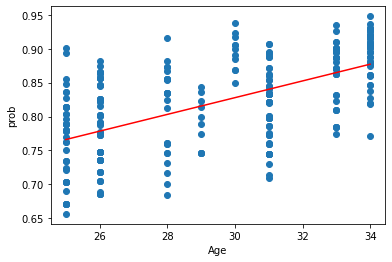

In [477]:
oneRegGraph('Age', one_reg_6)

#### two reg

In [478]:
getR2_tworeg(df_rule_6, numerical_col)

Age&AnnualIncome:0.568
Age&FamilyMembers:0.574
AnnualIncome&FamilyMembers:0.485


In [479]:
X = df_rule_6[['Age','FamilyMembers' ]]
y = df_rule_6['proba_1']

# 모델 객체 생성,
two_reg_6 = LinearRegression(fit_intercept = True)
two_reg_6.fit(X, y) 

LinearRegression()

In [480]:
r2 = round(two_reg_6.score(X, y),3)
print("R-Squared :", r2)

R-Squared : 0.574


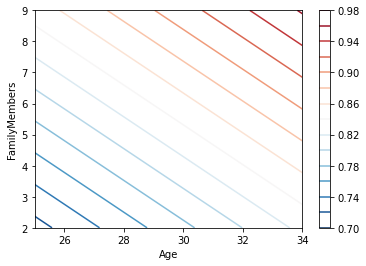

In [481]:
getContour('Age','FamilyMembers', two_reg_6, 9, 11)

# Using Regression Tree (랜덤포레스트 사후확률 이용)

## y=1 확률이 종속변수인 데이터프레임 만들기

In [293]:
X = df.drop(columns='TravelInsurance')
y = df['TravelInsurance'].copy()

In [296]:
rfc = RandomForestClassifier(max_depth= 7, min_samples_leaf= 8, min_samples_split= 20, n_estimators= 301, random_state=0)
rfc.fit(X, y)

RandomForestClassifier(max_depth=7, min_samples_leaf=8, min_samples_split=20,
                       n_estimators=301, random_state=0)

In [297]:
print(rfc.score(X,y))

0.8329139406139909


In [298]:
y_pred = rfc.predict_proba(X)

In [308]:
y_pred[:,1]

array([0.15178128, 0.2334515 , 0.28238691, ..., 0.17896867, 0.60475431,
       0.23183285])

In [309]:
df_rf = df.copy()
df_rf["proba_1"] = y_pred[:,1]
df_rf = df_rf.drop(columns='TravelInsurance')

## y=1 확률 값을 종속변수로 Regression Tree 생성

In [310]:
X = df_rf.drop(columns='proba_1')
y = df_rf['proba_1']

reg_tree = DecisionTreeRegressor(max_depth=1, random_state=0)
reg_tree.fit(X, y)

DecisionTreeRegressor(max_depth=1, random_state=0)

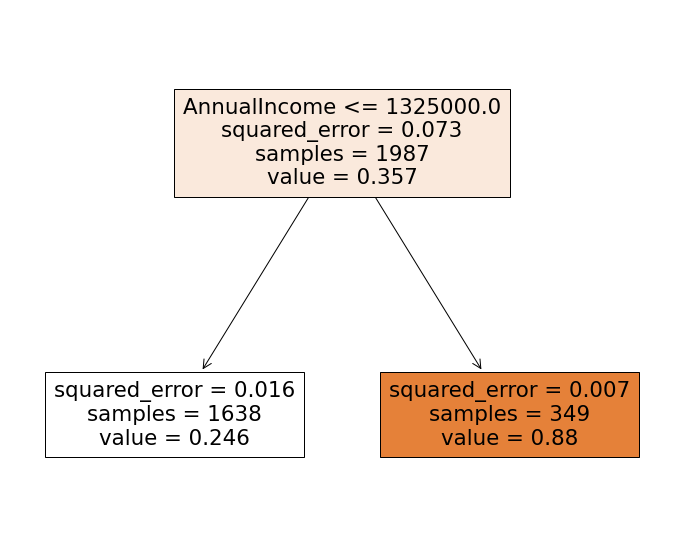

In [311]:
plt.figure(figsize=(12,10))
tree.plot_tree(reg_tree, feature_names=X.columns, filled=True)
plt.show()

In [312]:
reg_tree = DecisionTreeRegressor(max_depth=2, random_state=0)
reg_tree.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=0)

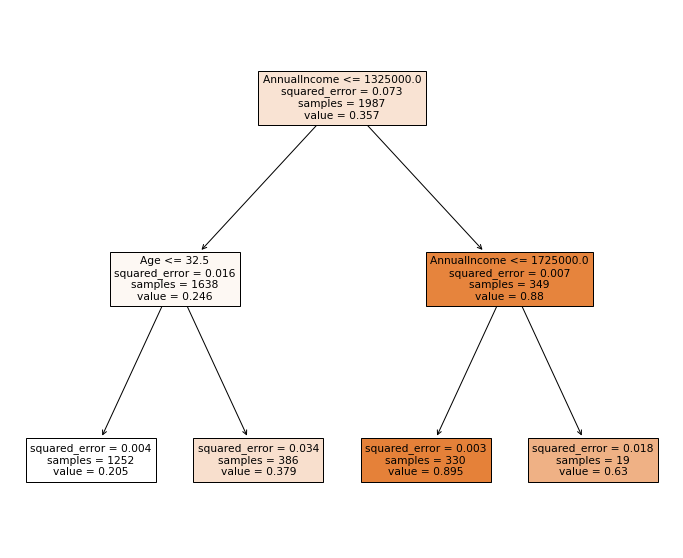

In [313]:
# plot tree
plt.figure(figsize=(12,10))
tree.plot_tree(reg_tree, feature_names=X.columns, filled=True)
plt.show()

## subset에 대한 regression

In [303]:
df_rule = df_rf.copy()

In [304]:
df_rule

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,proba_1
0,31,1,1,400000,6,1,0,0,0.151781
1,31,0,1,1250000,7,0,0,0,0.233451
2,34,0,1,500000,4,1,0,0,0.282387
3,28,0,1,700000,3,1,0,0,0.215742
4,28,0,1,700000,8,1,1,0,0.238639
...,...,...,...,...,...,...,...,...,...
1982,33,0,1,1500000,4,0,1,1,0.935753
1983,28,0,1,1750000,5,1,0,1,0.732050
1984,28,0,1,1150000,6,1,0,0,0.178969
1985,34,0,1,1000000,6,0,1,1,0.604754


### rule1: AnnualIncome <= 1325000

In [305]:
df_rule_1 = df_rule[df_rule['AnnualIncome']<=1325000].copy()

#### one reg

In [379]:
numerical_col = ['Age', 'AnnualIncome', 'FamilyMembers']

def getR2_onereg(df, numerical_cols):
    for col in numerical_col:
        X = df[[col]]
        y = df['proba_1']

        m_reg = LinearRegression(fit_intercept = True)
        m_reg.fit(X, y) 
        r2 = round(m_reg.score(X, y),3)
        print(col + ':' + str(r2))

In [380]:
getR2_onereg(df_rule_1, numerical_col)

Age:0.202
AnnualIncome:0.066
FamilyMembers:0.109


In [381]:
X = df_rule_1[['Age']]
y = df_rule_1['proba_1']

# 모델 객체 생성,
one_reg_1 = LinearRegression(fit_intercept = True)
one_reg_1.fit(X, y) 

LinearRegression()

In [382]:
r2 = round(one_reg_1.score(X, y),3)
print("R-Squared :", r2)

R-Squared : 0.202


In [383]:
def oneRegGraph(col, one_reg):
    coef = float(one_reg.coef_[0])
    intercept = float(one_reg.intercept_)

    x_minmax = np.array([min(X[col]), max(X[col])])
    fit_y = x_minmax * coef  + intercept

    plt.scatter(X, y)
    plt.plot(x_minmax, fit_y, color = 'red')
    plt.xlabel(col)
    plt.ylabel('prob')
    plt.show()

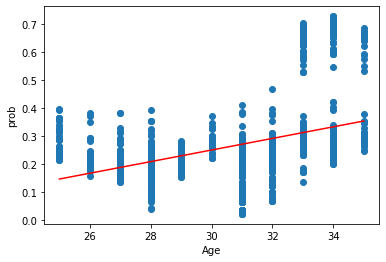

In [384]:
oneRegGraph('Age', one_reg_1)

#### two reg


In [325]:
def getR2_tworeg(df, numerical_cols):
    for i in range(len(numerical_cols)):
        for j in range(len(numerical_cols)):
            if i < j:
                X = df[[numerical_cols[i],numerical_cols[j]]]
                y = df['proba_1']

                m_reg = LinearRegression(fit_intercept = True)
                m_reg.fit(X, y) 
                r2 = round(m_reg.score(X, y),3)
                print(numerical_cols[i] + '&' + numerical_cols[j] + ':' + str(r2))

In [326]:
getR2_tworeg(df_rule_1, numerical_col)

Age&AnnualIncome:0.245
Age&FamilyMembers:0.303
AnnualIncome&FamilyMembers:0.172


In [327]:
X = df_rule_1[['Age', 'FamilyMembers']]
y = df_rule_1['proba_1']

# 모델 객체 생성,
two_reg_1 = LinearRegression(fit_intercept = True)
two_reg_1.fit(X, y) 

LinearRegression()

In [328]:
r2 = round(two_reg_1.score(X, y),3)
print("R-Squared :", r2)

R-Squared : 0.303


In [330]:
def twoRegResult(x1, x2, coef, icpt):
    return x1*coef[0] + x2*coef[1] + icpt

def getContour(col1, col2, two_reg, x_n, y_n):
    xrange = np.linspace(X[col1].min(), X[col1].max(), x_n)
    yrange = np.linspace(X[col2].min(), X[col2].max(), y_n)
    xmesh, ymesh = np.meshgrid(xrange, yrange)

    zmesh = twoRegResult(xmesh, ymesh, two_reg.coef_, two_reg.intercept_)
    
    cntr = plt.contour(xmesh, ymesh, zmesh, levels=15, cmap="RdBu_r")
    plt.colorbar(cntr)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show    

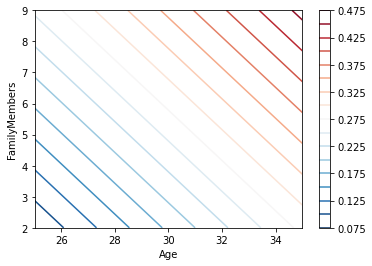

In [331]:
getContour('Age', 'FamilyMembers', two_reg_1, 100, 9)

In [332]:
def getAccuracy_by_rt(orgin_df, rule_df):
    origin_target = orgin_df.iloc[rule_df[rule_df['proba_1']>=0.5].index,-1]
    return origin_target.sum()/len(origin_target)

getAccuracy_by_rt(df, df_rule_1)

0.8793103448275862

### rule2:  rule1: AnnualIncome > 1325000

In [333]:
df_rule_2 = df_rule[df_rule['AnnualIncome']>1325000].copy()

#### one reg

In [334]:
getR2_onereg(df_rule_2, numerical_col)

Age:0.003
AnnualIncome:0.286
FamilyMembers:0.0


In [335]:
X = df_rule_2[['AnnualIncome']]
y = df_rule_2['proba_1']

# 모델 객체 생성,
one_reg_2 = LinearRegression(fit_intercept = True)
one_reg_2.fit(X, y) 

LinearRegression()

In [336]:
r2 = round(one_reg_2.score(X, y),3)
print("R-Squared :", r2)

R-Squared : 0.286


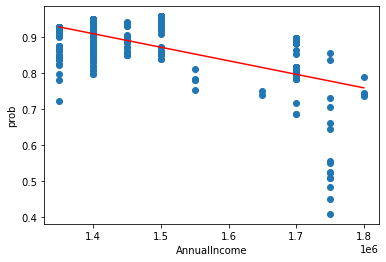

In [337]:
oneRegGraph('AnnualIncome', one_reg_2)

#### two reg

In [338]:
getR2_tworeg(df_rule_2, numerical_col)

Age&AnnualIncome:0.288
Age&FamilyMembers:0.003
AnnualIncome&FamilyMembers:0.288


In [339]:
X = df_rule_2[['AnnualIncome', 'FamilyMembers']]
y = df_rule_2['proba_1']

# 모델 객체 생성,
two_reg_2 = LinearRegression(fit_intercept = True)
two_reg_2.fit(X, y) 

LinearRegression()

In [340]:
r2 = round(two_reg_2.score(X, y),3)
print("R-Squared :", r2)

R-Squared : 0.288


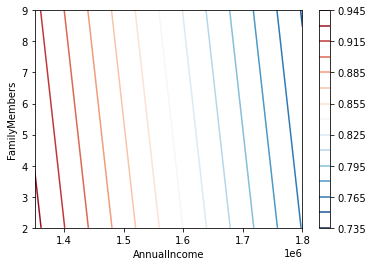

In [341]:
getContour('AnnualIncome', 'FamilyMembers', two_reg_2, 100, 10)

In [342]:
X = df_rule_2[['AnnualIncome', 'Age',]]
y = df_rule_2['proba_1']

# 모델 객체 생성,
two_reg_2 = LinearRegression(fit_intercept = True)
two_reg_2.fit(X, y) 

LinearRegression()

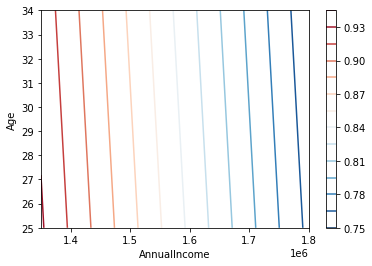

In [343]:
getContour('AnnualIncome', 'Age', two_reg_2, 100, 10)

### rule3: 1325000<=  AnnualIncome , Age <= 32

In [344]:
df_rule_3 = df_rule[(df_rule['AnnualIncome']<=1325000) & (df_rule['Age']<= 32)].copy()

#### one reg

In [345]:
getR2_onereg(df_rule_3, numerical_col)

Age:0.015
AnnualIncome:0.188
FamilyMembers:0.021


In [346]:
X = df_rule_3[['AnnualIncome']]
y = df_rule_3['proba_1']

# 모델 객체 생성,
one_reg_3 = LinearRegression(fit_intercept = True)
one_reg_3.fit(X, y) 

LinearRegression()

In [347]:
r2 = round(one_reg_3.score(X, y),3)
print("R-Squared :", r2)

R-Squared : 0.188


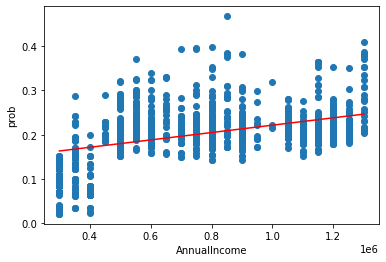

In [348]:
oneRegGraph('AnnualIncome', one_reg_3)

#### two reg

In [349]:
getR2_tworeg(df_rule_3, numerical_col)

Age&AnnualIncome:0.202
Age&FamilyMembers:0.038
AnnualIncome&FamilyMembers:0.206


In [350]:
X = df_rule_3[['AnnualIncome','Age']]
y = df_rule_3['proba_1']

# 모델 객체 생성,
two_reg_3 = LinearRegression(fit_intercept = True)
two_reg_3.fit(X, y) 

LinearRegression()

In [351]:
r2 = round(two_reg_3.score(X, y),3)
print("R-Squared :", r2)

R-Squared : 0.202


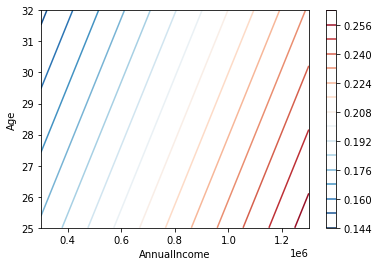

In [352]:
getContour('AnnualIncome','Age', two_reg_3, 100, 5)

### rule4: AnnualIncome<=1325000   , Age > 32

In [353]:
df_rule_4 = df_rule[(df_rule['AnnualIncome']<=1325000) & (df_rule['Age']> 32)].copy()

#### one reg

In [354]:
getR2_onereg(df_rule_4, numerical_col)

Age:0.005
AnnualIncome:0.007
FamilyMembers:0.63


In [355]:
X = df_rule_4[['FamilyMembers']]
y = df_rule_4['proba_1']

# 모델 객체 생성,
one_reg_4 = LinearRegression(fit_intercept = True)
one_reg_4.fit(X, y) 

LinearRegression()

In [356]:
r2 = round(one_reg_4.score(X, y),3)
print("R-Squared :", r2)

R-Squared : 0.63


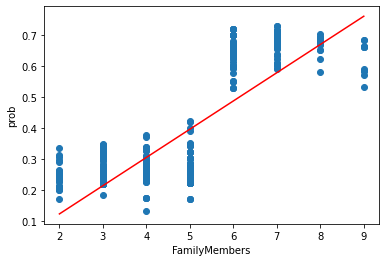

In [357]:
oneRegGraph('FamilyMembers', one_reg_4)

#### two reg

In [358]:
getR2_tworeg(df_rule_4, numerical_col)

Age&AnnualIncome:0.01
Age&FamilyMembers:0.634
AnnualIncome&FamilyMembers:0.642


In [359]:
X = df_rule_4[['AnnualIncome','FamilyMembers' ]]
y = df_rule_4['proba_1']

# 모델 객체 생성,
two_reg_4 = LinearRegression(fit_intercept = True)
two_reg_4.fit(X, y) 

LinearRegression()

In [360]:
r2 = round(two_reg_4.score(X, y),3)
print("R-Squared :", r2)

R-Squared : 0.642


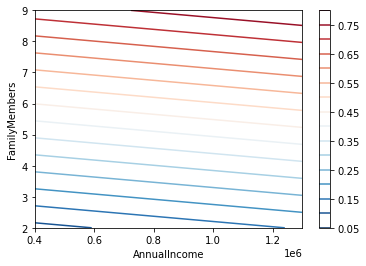

In [361]:
getContour('AnnualIncome','FamilyMembers', two_reg_4, 100, 11)

### rule5: 1325000 < AnnualIncome <= 1725000

In [362]:
df_rule_5 = df_rule[(df_rule['AnnualIncome'] > 1325000) & (df_rule['AnnualIncome']<=1725000)].copy()

#### one reg

In [363]:
getR2_onereg(df_rule_5, numerical_col)

Age:0.036
AnnualIncome:0.077
FamilyMembers:0.0


In [364]:
X = df_rule_5[['AnnualIncome']]
y = df_rule_5['proba_1']

# 모델 객체 생성,
one_reg_5 = LinearRegression(fit_intercept = True)
one_reg_5.fit(X, y) 

LinearRegression()

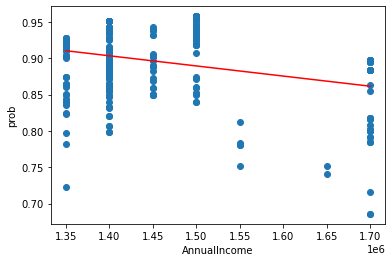

In [365]:
oneRegGraph('AnnualIncome', one_reg_5)

#### two reg

In [366]:
getR2_tworeg(df_rule_5, numerical_col)

Age&AnnualIncome:0.095
Age&FamilyMembers:0.036
AnnualIncome&FamilyMembers:0.077


In [367]:
X = df_rule_5[['AnnualIncome','FamilyMembers' ]]
y = df_rule_5['proba_1']

# 모델 객체 생성,
two_reg_5 = LinearRegression(fit_intercept = True)
two_reg_5.fit(X, y) 

LinearRegression()

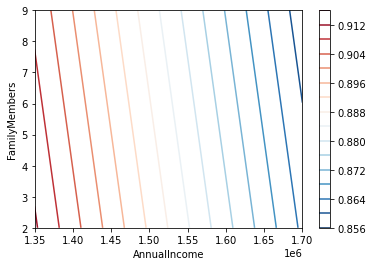

In [368]:
getContour('AnnualIncome','FamilyMembers', two_reg_5, 100, 11)

### rule6: 1725000 < AnnualIncome 

In [369]:
df_rule_6 = df_rule[df_rule['AnnualIncome']>1725000].copy()

#### one reg

In [370]:
getR2_onereg(df_rule_6, numerical_col)

Age:0.338
AnnualIncome:0.227
FamilyMembers:0.035


In [371]:
X = df_rule_6[['Age']]
y = df_rule_6['proba_1']

# 모델 객체 생성,
one_reg_6 = LinearRegression(fit_intercept = True)
one_reg_6.fit(X, y) 

LinearRegression()

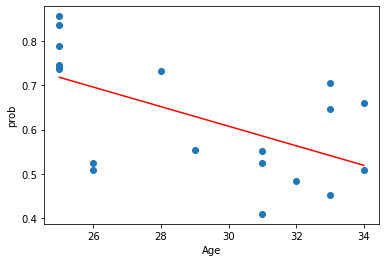

In [372]:
oneRegGraph('Age', one_reg_6)

#### two reg

In [373]:
getR2_tworeg(df_rule_6, numerical_col)

Age&AnnualIncome:0.365
Age&FamilyMembers:0.377
AnnualIncome&FamilyMembers:0.228


In [374]:
X = df_rule_6[['Age','FamilyMembers' ]]
y = df_rule_6['proba_1']

# 모델 객체 생성,
two_reg_6 = LinearRegression(fit_intercept = True)
two_reg_6.fit(X, y) 

LinearRegression()

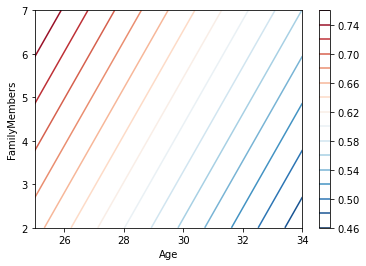

In [375]:
getContour('Age','FamilyMembers', two_reg_6, 9, 11)

# Stable CRI

In [162]:
from modules.stableCRI import stable_concise_rule_induction # file 제공

dataset = df.copy()
target_name = 'TravelInsurance' # target name을 꼭 입력해주시길 바랍니다.
colnm = dataset.columns
X = dataset.loc[:,colnm [colnm != target_name]]
y = dataset.loc[:, target_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

# Concatenating X,y -> training dataset([X_train,y_train]), test dataset([X_test,y_test]) 
train_idx, test_idx = X_train.index, X_test.index
df_train, df_test = dataset.loc[train_idx,:], dataset.loc[test_idx,:]

In [163]:
# fitting
min_sample_ratio = 0.03
min_samples = round(min_sample_ratio * len(df_train))
max_depth = 3 # max_depth 3 이상일때는 같아서 3으로 진행

cri = stable_concise_rule_induction(min_samples = min_samples, max_depth = max_depth)
cri.fit(data = df_train, target_name = target_name, iter_num = 20, rule_rate = 0.9) 

In [164]:
pred_y, acc, f1 = cri.predict(df_test)
acc,f1

(0.8291, 0.7991)

In [165]:
cm = confusion_matrix(y_test, pred_y)
print(cm)

[[242  10]
 [ 58  88]]


In [166]:
# exporting rules to text
cri.export_text()

IF ['AnnualIncome < 375000.0'] THEN TravelInsurance = 0   (homogeneity = 0.9421 , coverage = 0.0761 )
IF ['AnnualIncome >= 1325000.0'] THEN TravelInsurance = 1   (homogeneity = 0.9114 , coverage = 0.1705 )
IF ['AnnualIncome >= 1325000.0'] THEN TravelInsurance = 1   (homogeneity = 0.9114 , coverage = 0.1705 )
IF ['AnnualIncome < 425000.0'] THEN TravelInsurance = 0   (homogeneity = 0.9153 , coverage = 0.1114 )
IF ['AnnualIncome >= 375000.0', 'AnnualIncome < 1325000.0', 'Age < 28.5'] THEN TravelInsurance = 0   (homogeneity = 0.811 , coverage = 0.343 )
IF ['Age < 28.5'] THEN TravelInsurance = 0   (homogeneity = 0.6884 , coverage = 0.4726 )
IF ['AnnualIncome >= 375000.0', 'AnnualIncome < 1325000.0', 'FamilyMembers < 5.5'] THEN TravelInsurance = 0   (homogeneity = 0.7908 , coverage = 0.5205 )
IF ['AnnualIncome >= 375000.0', 'AnnualIncome < 1325000.0', 'Age < 31.5'] THEN TravelInsurance = 0   (homogeneity = 0.8009 , coverage = 0.5312 )
IF ['FamilyMembers < 5.5'] THEN TravelInsurance = 0   (ho

In [168]:
cri.df_concise_rule

,0,1,2,3,4,5,6,7,8,9
Rule,AnnualIncome < 375000.0,AnnualIncome < 425000.0,AnnualIncome >= 1325000.0,AnnualIncome >= 1325000.0,"AnnualIncome >= 375000.0, AnnualIncome < 13250...","AnnualIncome >= 375000.0, AnnualIncome < 13250...","AnnualIncome >= 375000.0, AnnualIncome < 13250...","AnnualIncome >= 375000.0, AnnualIncome < 13250...",Age < 28.5,FamilyMembers < 5.5
pred_y,0,0,1,1,1,0,0,0,0,0
Homogeneity,0.9421,0.9153,0.9114,0.9114,0.8986,0.811,0.8009,0.7908,0.6884,0.679
Coverage,0.0761,0.1114,0.1705,0.1705,0.0434,0.343,0.5312,0.5205,0.4726,0.696
# of condition,1.0,1.0,1.0,1.0,8.0,3.0,3.0,3.0,1.0,1.0


In [169]:
for i in range(10):
    print(cri.df_concise_rule[i][0])

AnnualIncome < 375000.0
AnnualIncome < 425000.0
AnnualIncome >= 1325000.0
AnnualIncome >= 1325000.0
AnnualIncome >= 375000.0, AnnualIncome < 1325000.0, AnnualIncome < 1325000.0, AnnualIncome >= 425000.0, Age >= 28.5, Age >= 28.5, FamilyMembers >= 5.5, Age >= 33.5
AnnualIncome >= 375000.0, AnnualIncome < 1325000.0, Age < 28.5
AnnualIncome >= 375000.0, AnnualIncome < 1325000.0, Age < 31.5
AnnualIncome >= 375000.0, AnnualIncome < 1325000.0, FamilyMembers < 5.5
Age < 28.5
FamilyMembers < 5.5


In [290]:
subset1 = df[(df['AnnualIncome']<375000)]
subset2 = df[(df['AnnualIncome']<425000)]
subset3 = df[(df['AnnualIncome']>=1325000)]
subset4 = df[(df['AnnualIncome']>=425000) &(df['AnnualIncome']<1325000)&(df['Age']>=33.5)&(df['FamilyMembers']>=5.5)]
subset5 = df[(df['AnnualIncome']>=375000) &(df['AnnualIncome']<1325000)&(df['Age']<28.5)]
subset6 = df[(df['AnnualIncome']>=375000) &(df['AnnualIncome']<1325000)&(df['Age']<31.5)]
subset7 = df[(df['AnnualIncome']>=375000) &(df['AnnualIncome']<1325000)&(df['FamilyMembers']<=5)]
subset8 = df[(df['Age']<=28)]
subset9 = df[(df['FamilyMembers']<=5)]

In [291]:
tot_subsets = [subset1,subset2,subset3,subset4,subset5,subset6,subset7,subset8,subset9]

In [292]:
for subset in tot_subsets:
    getHomecov(subset, len(df),'TravelInsurance', 1)

hom:0.9300699300699301 cov:0.07196779063915451
wa:0.06657288479799119
hom:0.9038461538461539 cov:0.1046804227478611
wa:0.09356134451184842
hom:0.9111747851002865 cov:0.17564167086059387
wa:0.13193052273091654
hom:0.8837209302325582 cov:0.043281328636134875
wa:0.03659316508487859
hom:0.8104477611940298 cov:0.33719174635128335
wa:0.2517245335749306
hom:0.8030592734225621 cov:0.5264217413185707
wa:0.3681716765417083
hom:0.7950428979980935 cov:0.5279315551082033
wa:0.3626042856828064
hom:0.6799140708915145 cov:0.4685455460493206
wa:0.2483006679805246
hom:0.6766595289079229 cov:0.7050830397584298
wa:0.3163549989881385


# 수입 제외_ruleInduction, DT

## CRI

In [62]:
from modules.stableCRI import stable_concise_rule_induction # file 제공

dataset = df.drop(columns='AnnualIncome').copy()
target_name = 'TravelInsurance' # target name을 꼭 입력해주시길 바랍니다.
colnm = dataset.columns
X = dataset.loc[:,colnm [colnm != target_name]]
y = dataset.loc[:, target_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

# Concatenating X,y -> training dataset([X_train,y_train]), test dataset([X_test,y_test]) 
train_idx, test_idx = X_train.index, X_test.index
df_train, df_test = dataset.loc[train_idx,:], dataset.loc[test_idx,:]

In [63]:
# fitting
min_sample_ratio = 0.03
min_samples = round(min_sample_ratio * len(df_train))
max_depth = 10 # 처음에는 2 또는 3으로 설정해서 돌려보고, 소요시간을 체크해보시기 바랍니다.

cri = stable_concise_rule_induction(min_samples = min_samples, max_depth = max_depth)
cri.fit(data = df_train, target_name = target_name, iter_num = 20, rule_rate = 0.9) 

In [70]:
#max depth 10
pred_y, acc, f1 = cri.predict(df_test)
acc,f1

(0.7864, 0.7527)

In [71]:
cm = confusion_matrix(y_test, pred_y)
print(cm)

[[230  22]
 [ 63  83]]


In [72]:
# exporting rules to text
cri.export_text()

IF ['EverTravelledAbroad >= 0.5'] THEN TravelInsurance = 1   (homogeneity = 0.7872 , coverage = 0.1863 )
IF ['EverTravelledAbroad < 0.5', 'Age < 32.5'] THEN TravelInsurance = 0   (homogeneity = 0.7913 , coverage = 0.1863 )
IF ['EverTravelledAbroad < 0.5', 'FamilyMembers < 5.5'] THEN TravelInsurance = 0   (homogeneity = 0.786 , coverage = 0.5645 )
IF ['FamilyMembers < 5.5'] THEN TravelInsurance = 0   (homogeneity = 0.679 , coverage = 0.696 )
IF ['EverTravelledAbroad < 0.5', 'Age >= 32.5', 'FamilyMembers >= 5.5', 'Age >= 33.5'] THEN TravelInsurance = 1   (homogeneity = 0.9016 , coverage = 0.0384 )
IF ['Age < 30.5'] THEN TravelInsurance = 0   (homogeneity = 0.6891 , coverage = 0.5972 )


In [73]:
cri.df_concise_rule

,0,1,2,3,4,5
Rule,"EverTravelledAbroad < 0.5, Age >= 32.5, Family...","EverTravelledAbroad < 0.5, Age < 32.5",EverTravelledAbroad >= 0.5,"EverTravelledAbroad < 0.5, FamilyMembers < 5.5",Age < 30.5,FamilyMembers < 5.5
pred_y,1,0,1,0,0,0
Homogeneity,0.9016,0.7913,0.7872,0.786,0.6891,0.679
Coverage,0.0384,0.1863,0.1863,0.5645,0.5972,0.696
# of condition,4.0,2.0,1.0,2.0,1.0,1.0


In [75]:
for i in range(cri.df_concise_rule.shape[1]):
    print(cri.df_concise_rule[i][0])

EverTravelledAbroad < 0.5, Age >= 32.5, FamilyMembers >= 5.5, Age >= 33.5
EverTravelledAbroad < 0.5, Age < 32.5
EverTravelledAbroad >= 0.5
EverTravelledAbroad < 0.5, FamilyMembers < 5.5
Age < 30.5
FamilyMembers < 5.5


In [288]:
def _coverage(subset,n):
    return subset.shape[0]/n
def _homogeneity(y):
    _, counts = np.unique(y, return_counts=True)
    ps = counts / len(y)
    return max(ps)

def _weightedAvg(cov, hom, dataset,target_name,target_y):
    p = len(dataset[dataset[target_name]==target_y])/len(df)
    return cov*(hom-p)

In [284]:
subset1 = df[(df['EverTravelledAbroad']==0) &(df['FamilyMembers']>5)&(df['Age']>33)]
subset2 = df[(df['EverTravelledAbroad']==0) &(df['Age']<=32)]
subset3 = df[(df['EverTravelledAbroad']==1)]
subset4 = df[(df['EverTravelledAbroad']==0) &(df['FamilyMembers']<=5)]
subset5 = df[(df['Age']<=30)]
subset6 = df[(df['FamilyMembers']<=5)]

In [285]:
tot_subsets = [subset1,subset2,subset3,subset4,subset5,subset6]

In [286]:
def getHomecov(sub, n, target_name,target_y):
    hom = _homogeneity(sub[target_name])
    cov = _coverage(sub, n)
    print("hom:"+str(hom),"cov:"+str(cov))
    print("wa:"+str(_weightedAvg(cov,hom, sub, target_name, target_y)))

In [289]:
for subset in tot_subsets:
    getHomecov(subset, len(df),'TravelInsurance', 1)

hom:0.8846153846153846 cov:0.03925515853044791
wa:0.033362553629289936
hom:0.7900241351568785 cov:0.6255661801711122
wa:0.4120418857450124
hom:0.7842105263157895 cov:0.19124308002013085
wa:0.12129318679114294
hom:0.7861579414374446 cov:0.5671867136386513
wa:0.377105184707139
hom:0.6826599326599326 cov:0.5978862606945143
wa:0.29471408138810673
hom:0.6766595289079229 cov:0.7050830397584298
wa:0.3163549989881385


## DT

In [97]:
# 테스트셋 분리
X = df.drop(columns='TravelInsurance').copy()
X = X.drop(columns='AnnualIncome')
y = df['TravelInsurance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

In [96]:
# fitting by gini
clf_tree = DecisionTreeClassifier(criterion = 'gini', max_depth=2) # default : gini
clf_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [99]:
# predicted class
pred_y = clf_tree.predict(X_test)

In [100]:
# accuracy score
train_acc = clf_tree.score(X_train,y_train)
test_acc = clf_tree.score(X_test,y_test)
print('train accuracy:', train_acc)
print('test accuracy:', test_acc)

train accuracy: 0.7551919446192574
test accuracy: 0.7361809045226131


In [101]:
# n_estimators: tree 갯수, max_features: 
param_grid = {'max_depth':range(2,20,1),
             'min_samples_split':range(2,100,10),
             'criterion':['gini','entropy']}

grid_cv = GridSearchCV(DecisionTreeClassifier(), param_grid, n_jobs=-1)
grid_cv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20),
                         'min_samples_split': range(2, 100, 10)})

In [102]:
print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 32}
0.8023768426482552


In [103]:
best_feature_importances = grid_cv.best_estimator_.feature_importances_
best_feature_importances

array([0.16255894, 0.00650568, 0.00256536, 0.23805233, 0.        ,
       0.04570594, 0.54461174])

In [104]:
sorted_idx = np.argsort(best_feature_importances)[::-1]

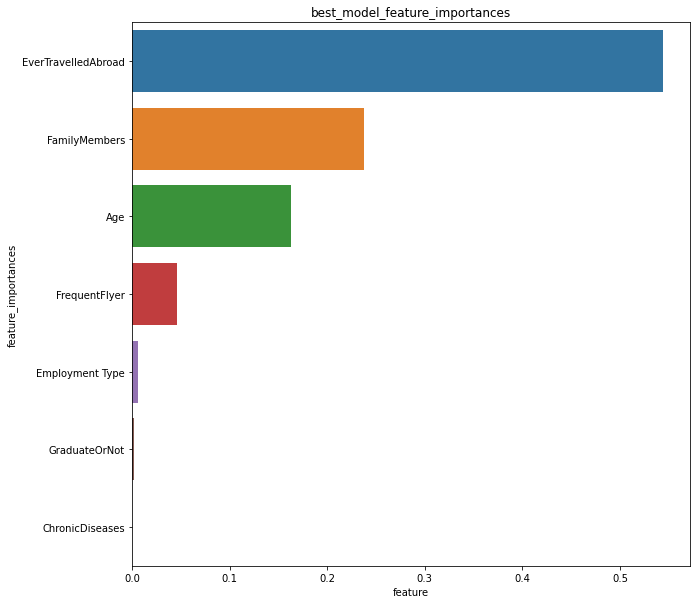

In [105]:
ft_importances = pd.Series(best_feature_importances)

ft_importances
plt.figure(figsize=(10,10))
plt.title("best_model_feature_importances")
plt.xlabel("feature")
plt.ylabel("feature_importances")
sns.barplot(ft_importances[sorted_idx], X.columns[sorted_idx])
plt.show()

In [132]:
# fitting by gini
clf_tree = DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_split= 32) # default : gini
clf_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=32)

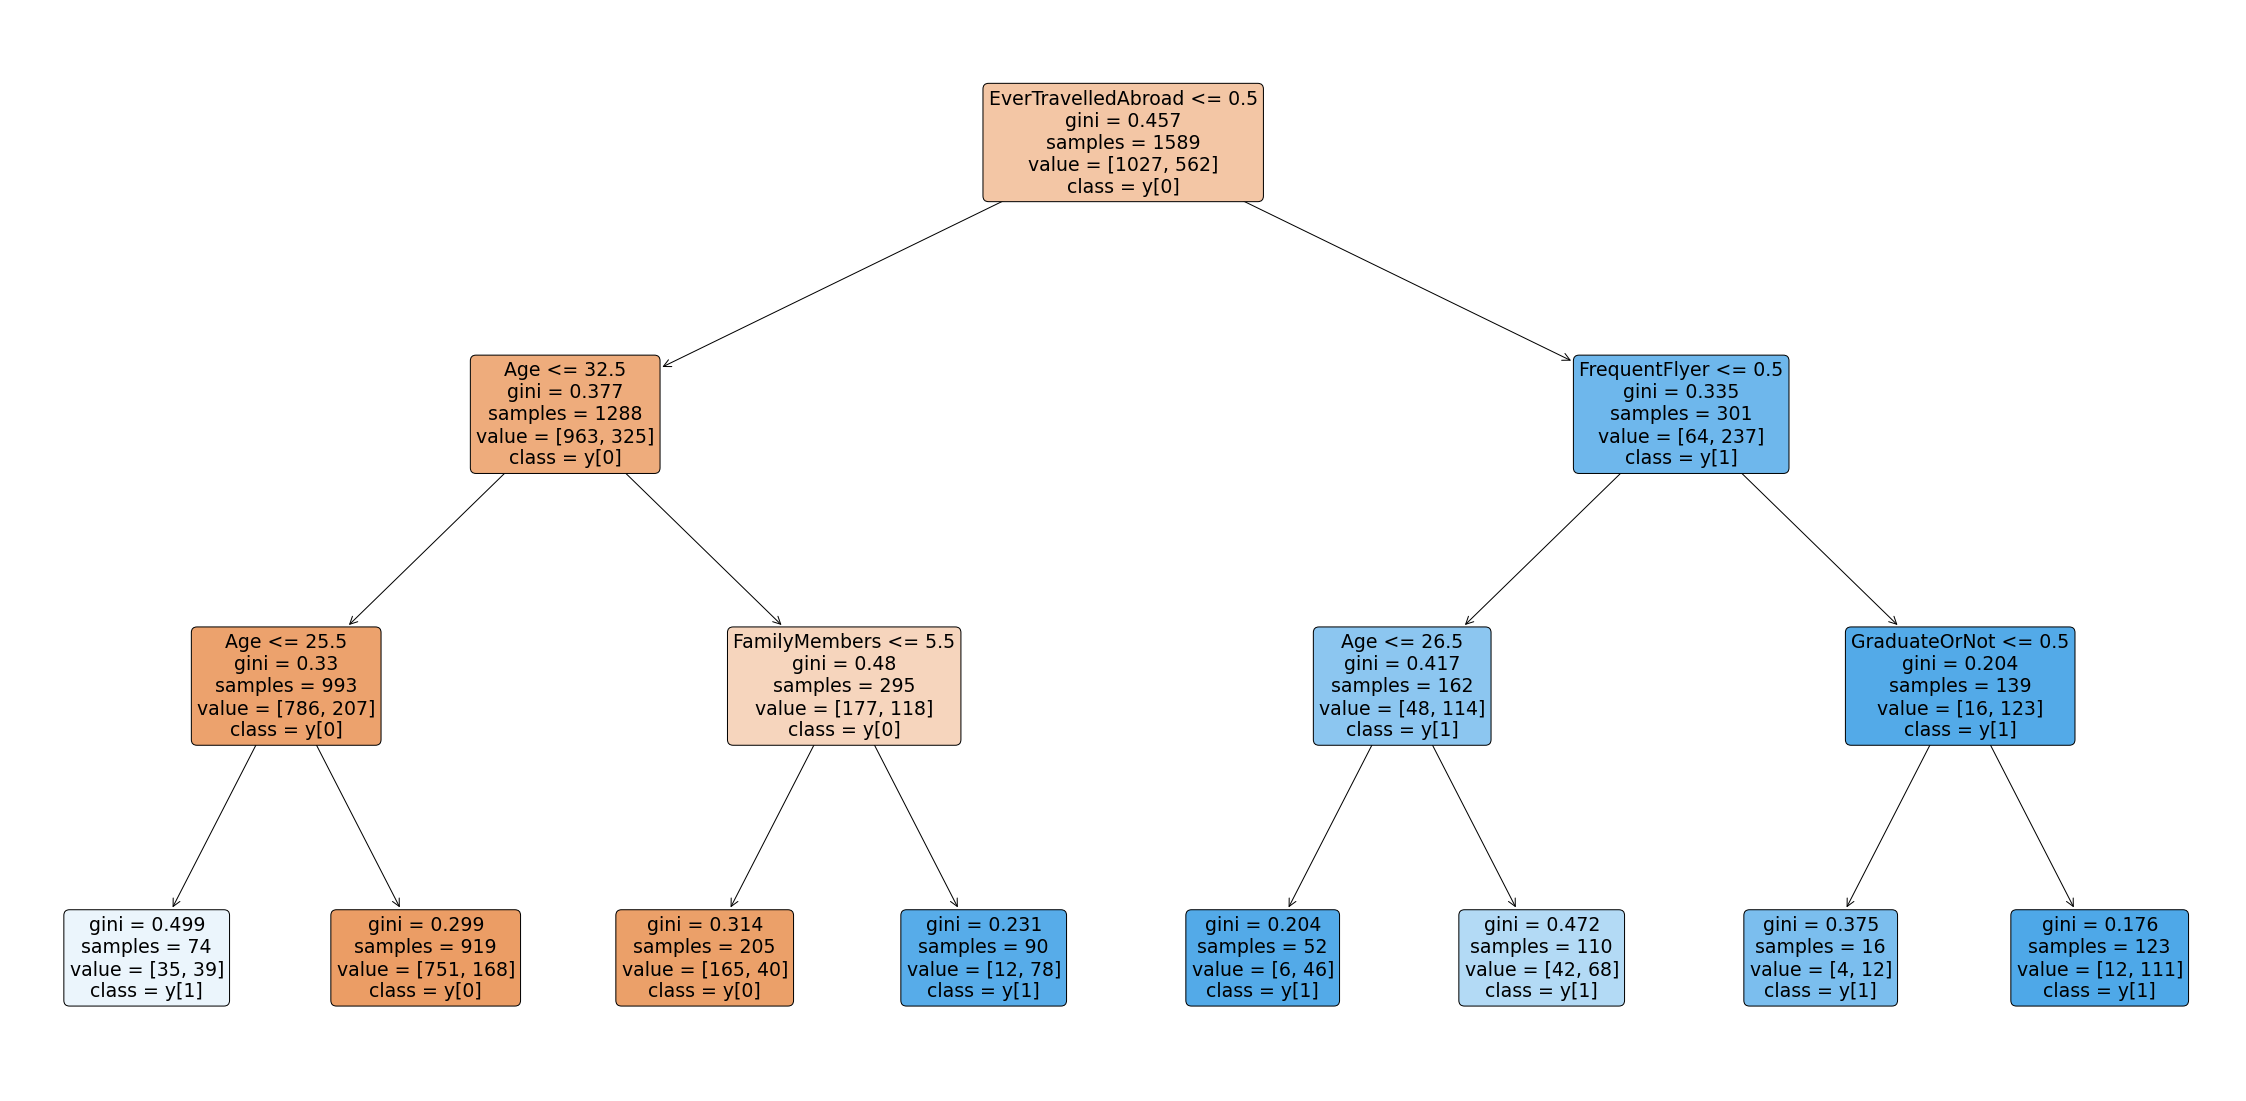

In [133]:
plt.figure(figsize=(40, 20)) 

tree.plot_tree(clf_tree,
               feature_names=X.columns, class_names=True,
               filled=True, rounded=True,)

plt.show()

# 수입, 해외여행, 자주여행 가는지 카이제곱 검정

## 수입 & 해외여행

In [86]:
inocme_r1 = df['AnnualIncome']<=425000
inocme_r2 = df['AnnualIncome']>425000
inocme_r3 = df['AnnualIncome']<=1325000
inocme_r4 = df['AnnualIncome']>1325000

Abroad_1 = df['EverTravelledAbroad']==0
Abroad_2 = df['EverTravelledAbroad']==1

n00 = len(df[inocme_r1 & Abroad_1])
n10 = len(df[inocme_r1 & Abroad_2])
n01 = len(df[inocme_r2 & inocme_r3 & Abroad_1])
n11 = len(df[inocme_r2 & inocme_r3 & Abroad_2])
n02 = len(df[inocme_r4 & Abroad_1])
n12 = len(df[inocme_r4 & Abroad_2])

In [89]:
obs = pd.DataFrame({'i<=425000':[n00, n10],'425000<i<=1325000':[n01, n11],'1325000<i':[n02, n12]})
obs.index=['해외여행 경험X','해외여행 경험O']

In [90]:
obs

,i<=425000,425000<i<=1325000,1325000<i
해외여행 경험X,205,1344,58
해외여행 경험O,3,86,291


In [91]:
from scipy.stats import chi2_contingency

chiresult = chi2_contingency(obs, correction = False)
print('Chi square:{}'.format(chiresult[0]))
print('P-value:{}'.format(chiresult[1]))

Chi square:1132.6232736580323
P-value:1.1323510511014918e-246


## 수입 & 자주 여행가는지 여부

In [92]:
inocme_r1 = df['AnnualIncome']<=425000
inocme_r2 = df['AnnualIncome']>425000
inocme_r3 = df['AnnualIncome']<=1325000
inocme_r4 = df['AnnualIncome']>1325000

frqntFly_1 = df['FrequentFlyer']==0
frqntFly_2 = df['FrequentFlyer']==1

n00 = len(df[inocme_r1 & frqntFly_1])
n10 = len(df[inocme_r1 & frqntFly_2])
n01 = len(df[inocme_r2 & inocme_r3 & frqntFly_1])
n11 = len(df[inocme_r2 & inocme_r3 & frqntFly_2])
n02 = len(df[inocme_r4 & frqntFly_1])
n12 = len(df[inocme_r4 & frqntFly_2])

In [93]:
obs = pd.DataFrame({'i<=425000':[n00, n10],'425000<i<=1325000':[n01, n11],'1325000<i':[n02, n12]})
obs.index=['자주여행X','자주여행O']

In [94]:
obs

,i<=425000,425000<i<=1325000,1325000<i
자주여행X,208,1213,149
자주여행O,0,217,200


In [95]:
from scipy.stats import chi2_contingency

chiresult = chi2_contingency(obs, correction = False)
print('Chi square:{}'.format(chiresult[0]))
print('P-value:{}'.format(chiresult[1]))

Chi square:362.0117668088967
P-value:2.455520959216202e-79
